## Financial Complaints Data:


These are real world complaints received about financial products and services. The dataset contains different information of complaints that customers have made about a multiple products and services in the financial sector, such us Credit Reports, Student Loans, Money Transfer, etc.


Learn more about dataset here: https://cfpb.github.io/api/ccdb/fields.html
Attached dataset is an extracted data from the database, this consists of consumer complaints of various products/services.

![Image Description (Optional)](https://i.pinimg.com/736x/9f/08/22/9f0822cced2ebca86334b576711a4df8.jpg)



## Statement of Consideration:

"**As a government officer**, I am approaching the analysis of this dataset with the primary objective of ensuring consumer protection and upholding the welfare of the public. The data insights will be utilized to identify areas requiring regulatory oversight, promote transparency, and ensure that businesses operate in the best interests of consumers. The intention is to derive **actionable insights** that can inform policy decisions, guide regulatory measures, and ultimately serve the greater good of the citizenry."



## About Data:

* #### Date received: 
   The date when the complaint was received by the Consumer Financial Protection Bureau (CFPB).

* #### Product: 
   The type of financial product or service that the consumer's complaint is about.

* #### Sub-product:
   A more detailed categorization of the product, providing further granularity.

* #### Issue: 
   The primary issue that the consumer is complaining about.

* #### Sub-issue: 
   A more detailed explanation or categorization of the issue, providing further granularity.

* #### Consumer complaint narrative: 
   A detailed description or narrative provided by the consumer about their complaint* .

* #### Company public response: 
   The official public response, if any, from the company regarding the complaint.

* #### Company: 
   The name of the company that the complaint is about.

* #### State: 
   The U.S. state from where the complaint was filed.

* #### ZIP code: 
   The ZIP code from where the complaint was filed.

* #### Tags: 
   Additional tags associated with the complaint, for example, identifying if the complaint was from an older American or a servicemember.

* #### Consumer consent provided?: 
   Indicates whether the consumer has given consent to publicly share their complaint narrative.

* #### Submitted via: 
   The method through which the consumer submitted their complaint (e.g., online, phone).

* #### Date sent to company: 
   The date when the complaint was forwarded by the CFPB to the company.

* #### Company response to consumer:
   How the company responded to the complaint, e.g., "Closed with explanation", "Closed with monetary relief".

* #### Timely response?:
   Indicates whether the company responded to the complaint in a timely manner.

* #### Consumer disputed?:
   Indicates whether the consumer disputed the company's response to their complaint.

* #### Complaint ID: 
   A unique identifier for the complaint.


This dataset contains real-world complaints about financial products and services received by the Consumer Financial Protection Bureau (CFPB). The data offers insights into various aspects of consumer complaints, from the nature of the complaints and the products involved to the companies' responses and the outcomes. By analyzing this dataset, we aim to understand patterns in consumer complaints and identify areas for intervention or improvement in the financial sector.

In [385]:
!pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable


### Importing Libraries

In [386]:
# Importing important libraries

import pandas as pd                                              # Data manipulation and analysis
import numpy as np
import matplotlib.pyplot as plt                                  # Data visualization
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Preprocessing
from sklearn.cluster import KMeans                               # KMeans Clustering
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score                     # Model Evaluation
from scipy.cluster.hierarchy import dendrogram, linkage          # Hierarchical clustering (if needed)
from IPython.display import Image, display                       # Display functionalities for Jupyter
import plotly.express as px
import plotly.graph_objects as go



### 1. Data Loading and Initial Exploration:


- **Load the dataset**:

In [387]:
df = pd.read_csv('Consumer_Complaints_sampled.csv',index_col = 0)

- **Initial exploration**: 

In [388]:
df.head()


Date received          Product Sub-product  \
0    03/16/2015  Debt collection        Auto   
1    01/30/2015  Debt collection        Auto   
2    03/16/2015  Debt collection        Auto   
3    03/16/2015  Debt collection        Auto   
4    03/16/2015  Debt collection        Auto   

                                Issue                          Sub-issue  \
0  False statements or representation  Attempted to collect wrong amount   
1  False statements or representation  Attempted to collect wrong amount   
2  False statements or representation  Attempted to collect wrong amount   
3  False statements or representation  Attempted to collect wrong amount   
4  False statements or representation  Attempted to collect wrong amount   

  Consumer complaint narrative  \
0                          NaN   
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   

                            Company public response              Company  \
0  Company chooses not to provide a public response  Ally Financial Inc.   
1                                               NaN       VW Credit, Inc   
2                                               NaN     URS Holding, LLC   
3  Company chooses not to provide a public response  Ally Financial Inc.   
4  Company chooses not to provide a public response  Ally Financial Inc.   

  State ZIP code Tags Consumer consent provided? Submitted via  \
0    CA    93534  NaN                        NaN           Fax   
1    CA    91902  NaN                        NaN           Fax   
2    CA    93534  NaN                        NaN           Fax   
3    CA    93534  NaN                        NaN           Fax   
4    CA    93534  NaN                        NaN           Fax   

  Date sent to company Company response to consumer Timely response?  \
0           03/20/2015      Closed with explanation              Yes   
1           02-04-2015  Closed with monetary relief              Yes   
2           03/20/2015      Closed with explanation              Yes   
3           03/20/2015      Closed with explanation              Yes   
4           03/20/2015      Closed with explanation              Yes   

  Consumer disputed?  Complaint ID  
0                 No       1283761  
1                 No       1217673  
2                 No       1283760  
3                 No       1283761  
4                 No       1283761

In [389]:
# shape of data

df.shape

(53200, 18)

In [390]:
# data types

df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [391]:
# data info..

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53200 entries, 0 to 53199
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 53200 non-null  object
 1   Product                       53200 non-null  object
 2   Sub-product                   53200 non-null  object
 3   Issue                         53200 non-null  object
 4   Sub-issue                     53200 non-null  object
 5   Consumer complaint narrative  4019 non-null   object
 6   Company public response       10986 non-null  object
 7   Company                       53200 non-null  object
 8   State                         52320 non-null  object
 9   ZIP code                      52319 non-null  object
 10  Tags                          8886 non-null   object
 11  Consumer consent provided?    6482 non-null   object
 12  Submitted via                 53200 non-null  object
 13  Date sent to com

In [392]:
# checking duplicates

df.duplicated().sum()

33046

### 2.  **Data Cleaning:**

- **Removing duplicates**:

Out of 53200 , 33046 are duplicate. It is a huge duplicated data.Then what we have to do in this situation.

**Decision**: 

It's often better to have a smaller, cleaner dataset than a larger, noisier one. If the duplicates are genuine redundancies (i.e., they don't bring new information), removing them can lead to more accurate and interpretable clusters.
Without duplicates, the clusters formed might be easier to interpret and understand since they won't be overly influenced by repeated data points.

In [393]:
cleaned_df = df.drop_duplicates()

In [394]:
cleaned_df

Date received          Product               Sub-product  \
0        03/16/2015  Debt collection                      Auto   
1        01/30/2015  Debt collection                      Auto   
2        03/16/2015  Debt collection                      Auto   
5        03-02-2015  Debt collection                      Auto   
6        03-04-2014  Debt collection                      Auto   
...             ...              ...                       ...   
53195    05-06-2016     Student loan  Non-federal student loan   
53196    09/14/2016     Student loan  Non-federal student loan   
53197    06-08-2016     Student loan  Non-federal student loan   
53198    02/27/2016     Student loan  Non-federal student loan   
53199    02-01-2016     Student loan  Non-federal student loan   

                                    Issue  \
0      False statements or representation   
1      False statements or representation   
2      False statements or representation   
5      False statements or representation   
6      False statements or representation   
...                                   ...   
53195  Dealing with my lender or servicer   
53196  Dealing with my lender or servicer   
53197  Dealing with my lender or servicer   
53198  Dealing with my lender or servicer   
53199  Dealing with my lender or servicer   

                                   Sub-issue  \
0          Attempted to collect wrong amount   
1          Attempted to collect wrong amount   
2          Attempted to collect wrong amount   
5          Attempted to collect wrong amount   
6          Attempted to collect wrong amount   
...                                      ...   
53195  Trouble with how payments are handled   
53196  Trouble with how payments are handled   
53197  Trouble with how payments are handled   
53198  Trouble with how payments are handled   
53199  Trouble with how payments are handled   

                            Consumer complaint narrative  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
5                                                    NaN   
6                                                    NaN   
...                                                  ...   
53195  On XXXX XXXX 2016, I received a statement from...   
53196  I had deferred payments set up while I was goi...   
53197                                                NaN   
53198  I signed up for auto payment on my Sallie Mae ...   
53199                                                NaN   

                                 Company public response  \
0       Company chooses not to provide a public response   
1                                                    NaN   
2                                                    NaN   
5                                                    NaN   
6                                                    NaN   
...                                                  ...   
53195  Company has responded to the consumer and the ...   
53196                                                NaN   
53197  Company believes it acted appropriately as aut...   
53198  Company believes it acted appropriately as aut...   
53199                                                NaN   

                                Company State ZIP code            Tags  \
0                   Ally Financial Inc.    CA    93534             NaN   
1                        VW Credit, Inc    CA    91902             NaN   
2                      URS Holding, LLC    CA    93534             NaN   
5      Minnesota Life Insurance Company    KY    40403             NaN   
6                 Wells Fargo & Company    NC    27048  Older American   
...                                 ...   ...      ...             ...   
53195                   Bank of America    KS    661XX             NaN   
53196           Navient Solutions, Inc.    CA    956XX       

In [395]:
cleaned_df.duplicated().sum()

0

- **Columns selected for clustering**:


We need to make clusters against

* product
* sub product
* issue
* sub issue
* submitted via 
* Company response to consumer
* Consumer disputed?
* Timely response?

**Reason to drop Complaint ID:**

Unique identifiers like "Complaint ID" have wide range of unique values. Including them in clustering can confuse the algorithm, making it focus on these unique IDs rather than meaningful patterns in the data.

In [396]:
# List of columns to retain
selected_columns = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Submitted via', 'Company response to consumer', 'Consumer disputed?', 'Timely response?']

# Dropping all other columns
dff = cleaned_df[selected_columns]


In [397]:
dff.head()

Product Sub-product                               Issue  \
0  Debt collection        Auto  False statements or representation   
1  Debt collection        Auto  False statements or representation   
2  Debt collection        Auto  False statements or representation   
5  Debt collection        Auto  False statements or representation   
6  Debt collection        Auto  False statements or representation   

                           Sub-issue Submitted via  \
0  Attempted to collect wrong amount           Fax   
1  Attempted to collect wrong amount           Fax   
2  Attempted to collect wrong amount           Fax   
5  Attempted to collect wrong amount           Fax   
6  Attempted to collect wrong amount           Fax   

      Company response to consumer Consumer disputed? Timely response?  
0          Closed with explanation                 No              Yes  
1      Closed with monetary relief                 No              Yes  
2          Closed with explanation                 No              Yes  
5  Closed with non-monetary relief                 No              Yes  
6          Closed with explanation                 No              Yes

- **Data Cleaning**:


In [398]:

dff = dff.reset_index(drop=True)

# cleaning column names
dff= dff.rename(columns = {'Consumer disputed?' : 'Consumer disputed','Timely response?':'Timely response'})

In [399]:
dff

Product               Sub-product  \
0      Debt collection                      Auto   
1      Debt collection                      Auto   
2      Debt collection                      Auto   
3      Debt collection                      Auto   
4      Debt collection                      Auto   
...                ...                       ...   
20149     Student loan  Non-federal student loan   
20150     Student loan  Non-federal student loan   
20151     Student loan  Non-federal student loan   
20152     Student loan  Non-federal student loan   
20153     Student loan  Non-federal student loan   

                                    Issue  \
0      False statements or representation   
1      False statements or representation   
2      False statements or representation   
3      False statements or representation   
4      False statements or representation   
...                                   ...   
20149  Dealing with my lender or servicer   
20150  Dealing with my lender or servicer   
20151  Dealing with my lender or servicer   
20152  Dealing with my lender or servicer   
20153  Dealing with my lender or servicer   

                                   Sub-issue Submitted via  \
0          Attempted to collect wrong amount           Fax   
1          Attempted to collect wrong amount           Fax   
2          Attempted to collect wrong amount           Fax   
3          Attempted to collect wrong amount           Fax   
4          Attempted to collect wrong amount           Fax   
...                                      ...           ...   
20149  Trouble with how payments are handled           Web   
20150  Trouble with how payments are handled           Web   
20151  Trouble with how payments are handled           Web   
20152  Trouble with how payments are handled           Web   
20153  Trouble with how payments are handled           Web   

          Company response to consumer Consumer disputed Timely response  
0              Closed with explanation                No             Yes  
1          Closed with monetary relief                No             Yes  
2              Closed with explanation                No             Yes  
3      Closed with non-monetary relief                No             Yes  
4              Closed with explanation                No             Yes  
...                                ...               ...             ...  
20149          Closed with explanation                No             Yes  
20150          Closed with explanation               NaN             Yes  
20151          Closed with explanation                No             Yes  
20152          Closed with explanation               Yes             Yes  
20153          Closed with explanation                No             Yes  

[20154 rows x 8 columns]

- **Handling Null Values**:


In [400]:
#checking nan values

dff.isna().sum()

Product                            0
Sub-product                        0
Issue                              0
Sub-issue                          0
Submitted via                      0
Company response to consumer       0
Consumer disputed               1629
Timely response                    0
dtype: int64

* **Fill NA :**

I am using "Neutral" for missing values because it means the consumer neither agreed nor disagreed with the company's response, and we don't have clear information about their opinion.

In [401]:
# fill missing values with "Neutral" assume that consumer neither agreed nor disagreed . 
dff['Consumer disputed'].fillna('Neutral', inplace=True)


In [402]:
dff.isna().sum()      # checkin again missing values.

Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Submitted via                   0
Company response to consumer    0
Consumer disputed               0
Timely response                 0
dtype: int64

### 3. Exploratory Data Analysis (EDA):

* **Value Counts and their Distribution plot :**


********** Product Value Counts ********

Debt collection    16943
Student loan        2553
Payday loan          658
Name: Product, dtype: int64


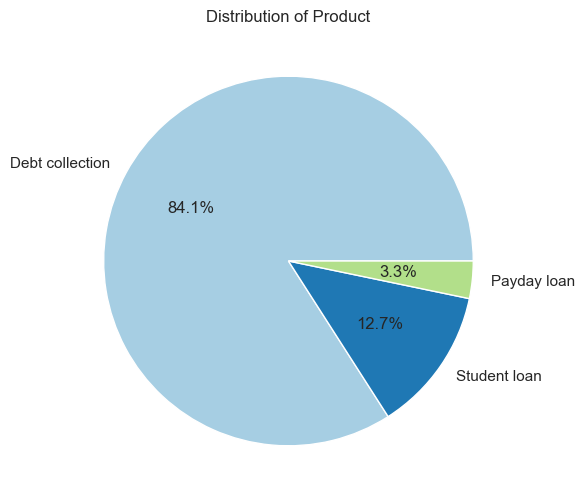


********** Sub-product Value Counts ********

Non-federal student loan                 3054
Other (i.e. phone, health club, etc.)    3028
Credit card                              2821
Payday loan                              2263
I do not know                            2177
Medical                                  2014
Mortgage                                 1565
Auto                                     1373
Federal student loan                     1093
Federal student loan servicing            766
Name: Sub-product, dtype: int64


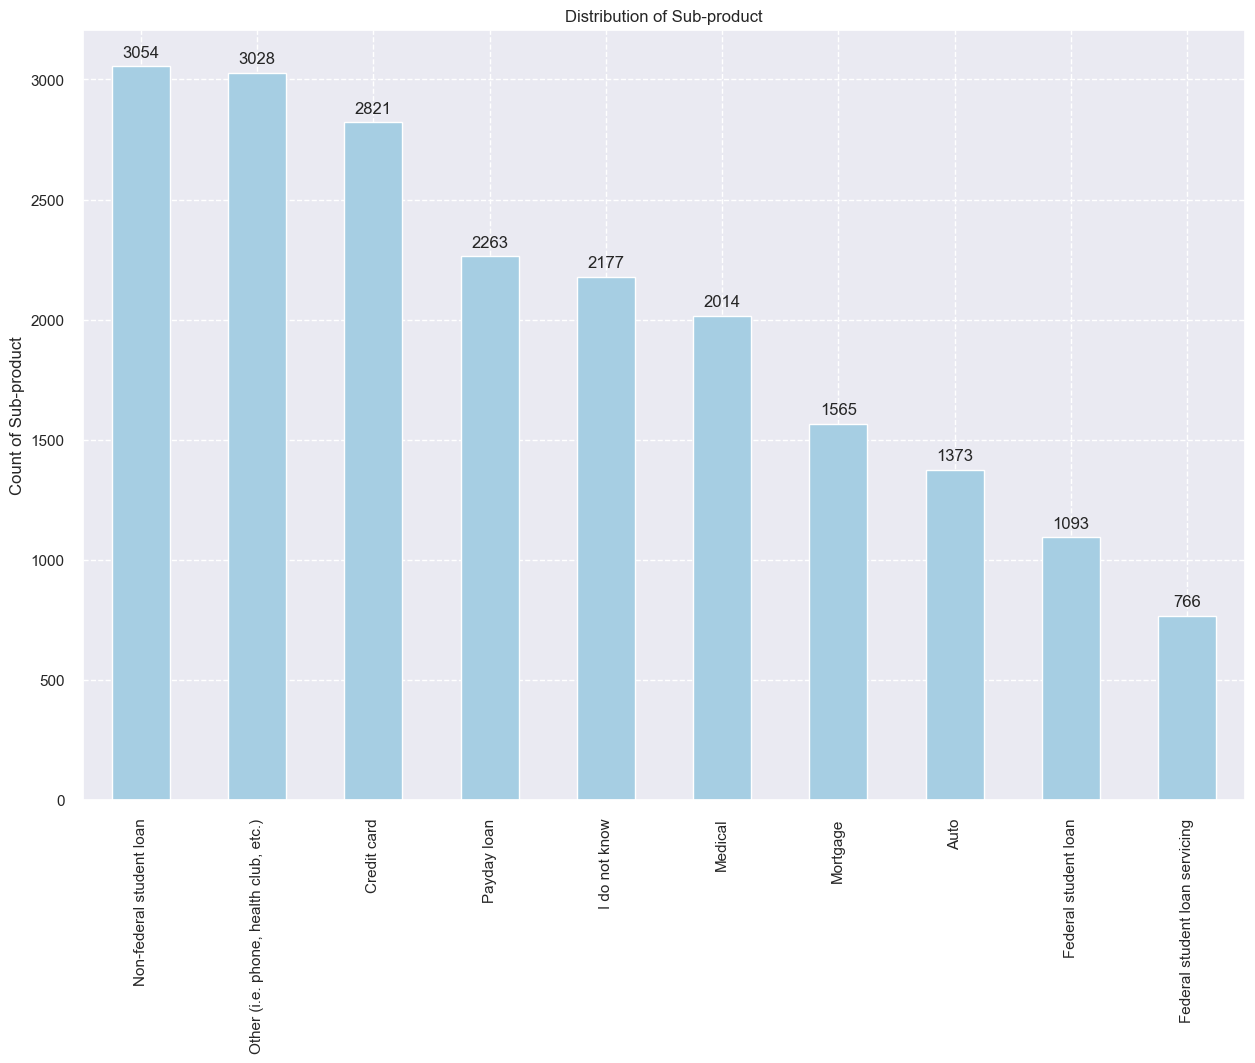


********** Issue Value Counts ********

Cont'd attempts collect debt not owed       4129
Communication tactics                       3787
Disclosure verification of debt             2830
Taking/threatening an illegal action        2351
False statements or representation          2002
Improper contact or sharing of info         1844
Dealing with my lender or servicer          1300
Can't repay my loan                          665
Getting a loan                               212
Repaying your loan                           193
Problems when you are unable to pay          183
Charged fees or interest I didn't expect     163
Applied for loan/did not receive money       100
Can't contact lender                          98
Received a loan I didn't apply for            83
Can't stop charges to bank account            78
Payment to acct not credited                  70
Charged bank acct wrong day or amt            66
Name: Issue, dtype: int64


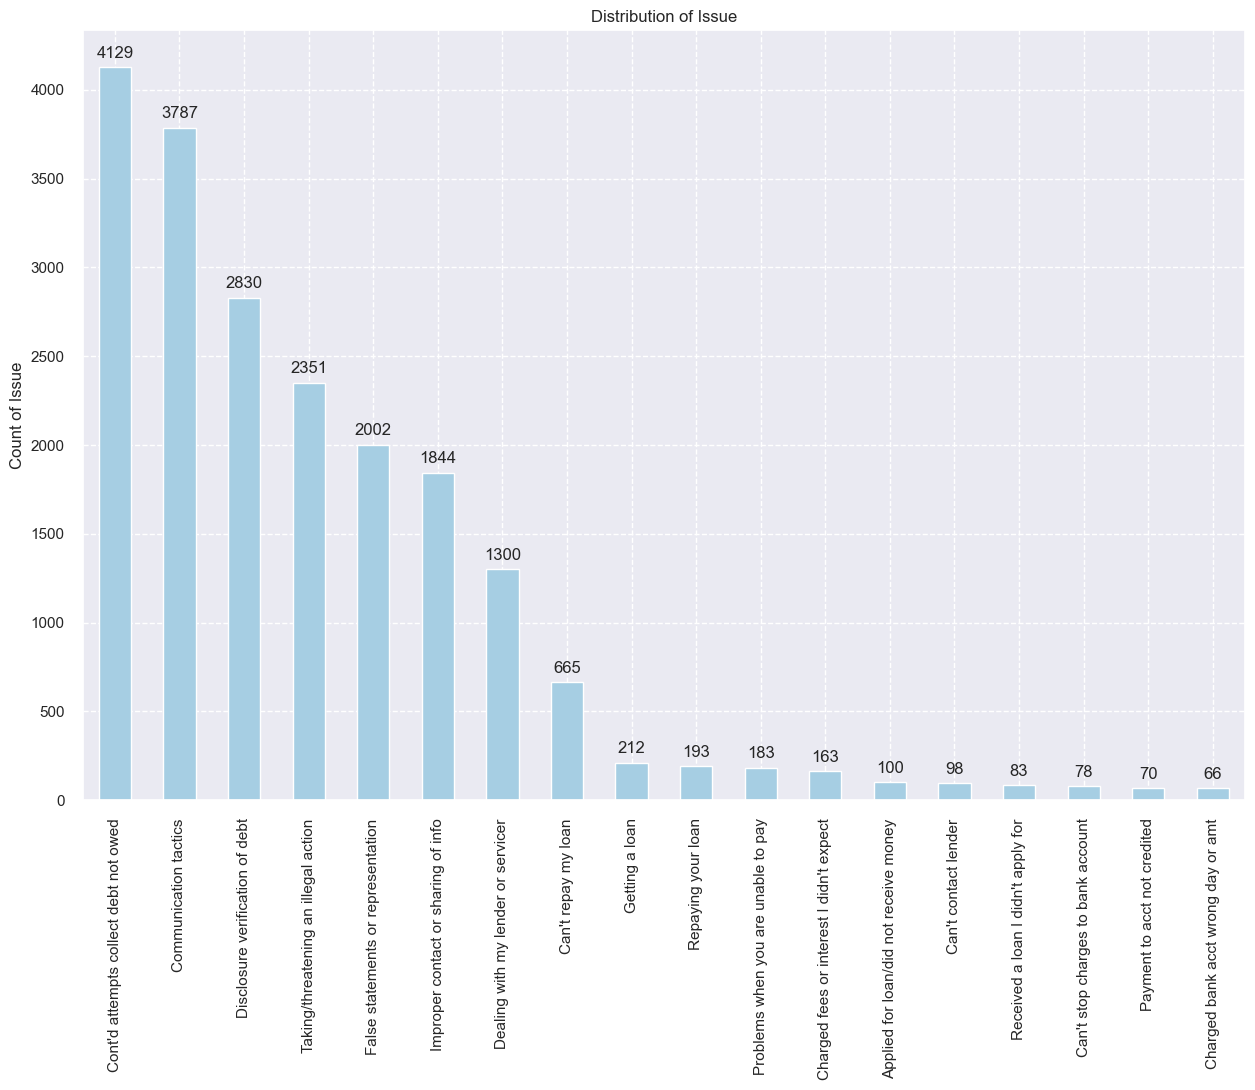


********** Sub-issue Value Counts ********

Not given enough info to verify debt        1557
Debt is not mine                            1470
Frequent or repeated calls                  1403
Debt was paid                               1350
Attempted to collect wrong amount           1126
Threatened to take legal action              909
Right to dispute notice not received         791
Talked to a third party about my debt        686
Debt was discharged in bankruptcy            656
Debt resulted from identity theft            653
Called after sent written cease of comm      560
Used obscene/profane/abusive language        537
Contacted me after I asked not to            523
Threatened to sue on too old debt            483
Not disclosed as an attempt to collect       482
Contacted employer after asked not to        467
Attempted to/Collected exempt funds          458
Threatened arrest/jail if do not pay         431
Seized/Attempted to seize property           401
Sued w/o proper notifica

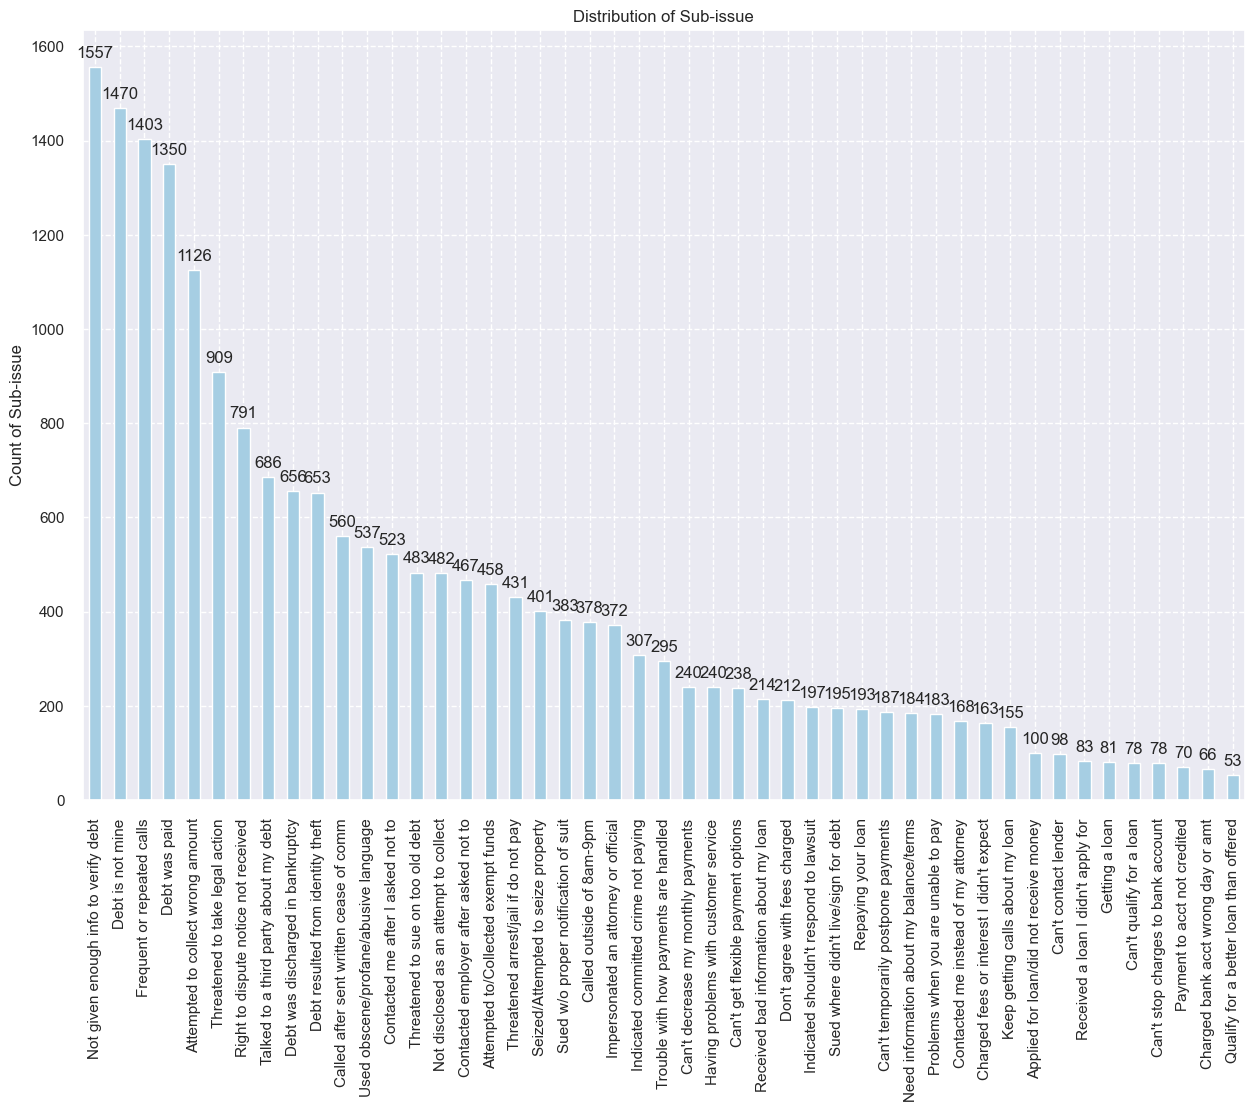


********** Submitted via Value Counts ********

Web            9831
Phone          3836
Referral       3080
Postal mail    2392
Fax             998
Email            17
Name: Submitted via, dtype: int64


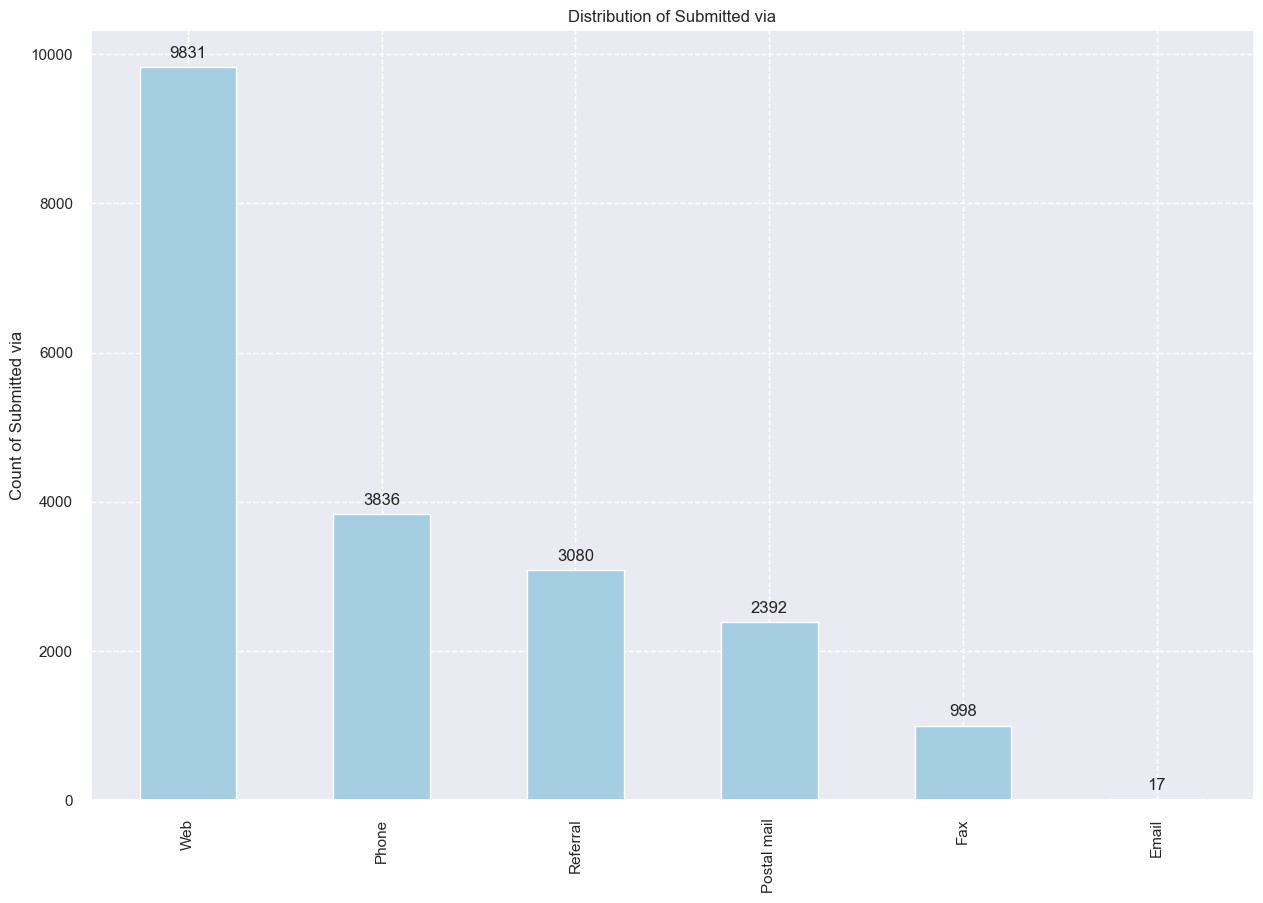


********** Company response to consumer Value Counts ********

Closed with explanation            16086
Closed with non-monetary relief     2387
Closed                               779
Closed with monetary relief          395
Untimely response                    368
In progress                          105
Closed without relief                 33
Closed with relief                     1
Name: Company response to consumer, dtype: int64


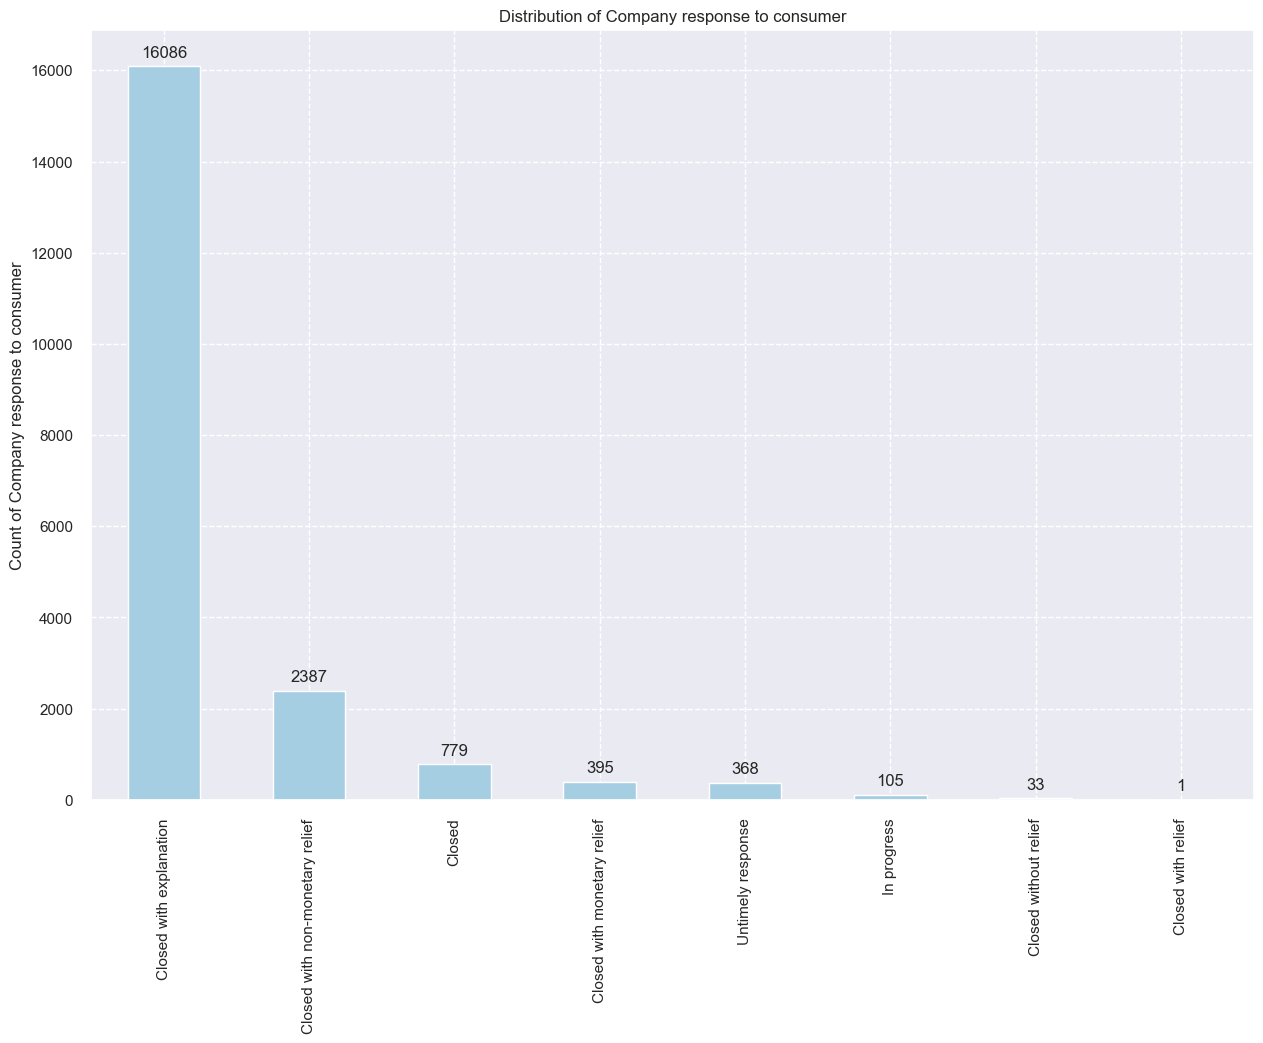


********** Consumer disputed Value Counts ********

No         15211
Yes         3314
Neutral     1629
Name: Consumer disputed, dtype: int64


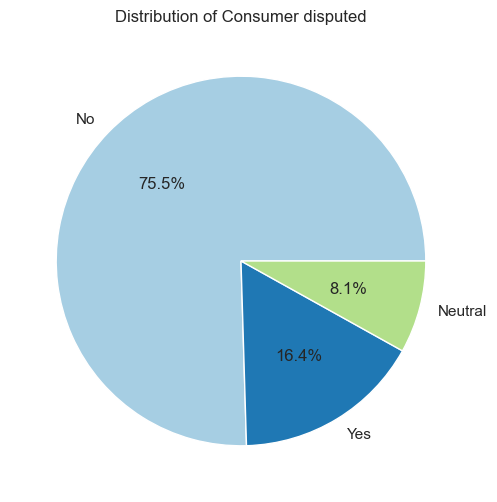


********** Timely response Value Counts ********

Yes    18797
No      1357
Name: Timely response, dtype: int64


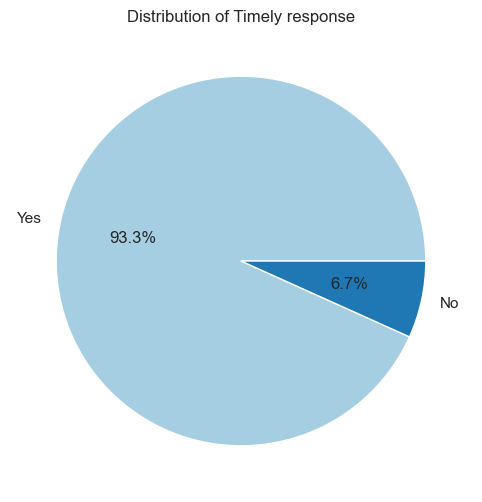

In [403]:

# Setting the style and palette
sns.set_theme()
sns.set_style( {'grid.linestyle': '--'})
sns.set_palette("Paired")

for i in dff.columns:
    print("\n**********" , i , "Value Counts" , "********\n")
    value_counts = dff[i].value_counts()
    print(value_counts)
    
    if len(value_counts.index) < 5:
        # Plot pie chart
        value_counts.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')
        plt.title('Distribution of ' + i)
        plt.ylabel('')  # This removes the column name from the side of the pie chart
        plt.show()
        
    else:
        # Plot bar chart
        ax = value_counts.plot(kind='bar', figsize=(15, 10))
        plt.title('Distribution of ' + i)
        plt.ylabel('Count of ' + i)  
        
        # Annotating each bar with its value
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
            
        plt.show()


## Summary of Value counts and Distribution:

**Product**

* The majority of complaints are related to "Debt collection" with 16,943 entries which is approximately 84.06% of the complaints, followed by "Student loan" with 2,553 entries for about 12.66% , and the least being "Payday loan" with 658 entries that is  3.27%.

**Sub - Product**

* Non-federal student loan has 3,054 complaints, accounting for approximately 15.17%.
* Other (i.e. phone, health club, etc.) received 3,028 complaints, making up about 15.02%.
* Credit card complaints number 2,821, comprising roughly 14.01%.
* Payday loan saw 2,263 complaints, equating to around 11.24%.
* I do not know category garnered 2,177 complaints, which is about 10.81%.
* Medical has 2,014 complaints, translating to roughly 10.00%.
* Mortgage complaints are at 1,565, making up around 7.77%.
* Auto complaints total 1,373, accounting for approximately 6.82%.
* Federal student loan complaints are 1,093, which is about 5.43%.
* Federal student loan servicing received 766 complaints, representing around 3.80%.

**Issue**

- **Cont'd attempts collect debt not owed (4,129 complaints)**: The top issue, with about 20.5%, where debt collectors persistently try to collect debts consumers believe they don't owe.
  
- **Communication tactics (3,787 complaints)**: Making up around 18.8%, consumers report being subject to inappropriate or aggressive communication methods by collectors.

- **Disclosure verification of debt (2,830 complaints)**: 14.1% of consumers have issues regarding the clarity or correctness of the debt information provided to them.

- **Taking/threatening an illegal action (2,351 complaints)**: About 11.7% of complaints involve collectors using or threatening to use illegal measures to retrieve debts.

- **False statements or representation (2,002 complaints)**: 10.0% of consumers report being given false or misleading information about their debts.

- **Improper contact or sharing of info (1,844 complaints)**: 9.2% of complaints pertain to collectors contacting others about a consumer's debt or disclosing it improperly.

- **Dealing with my lender or servicer (1,300 complaints)**: 6.5% of issues arise from interactions with loan lenders or servicers.

- **Can't repay my loan (665 complaints)**: 3.3% of consumers express difficulties in loan repayment.

- **Getting a loan (212 complaints)** & **Repaying your loan (193 complaints)**: Together, about 2.0% of consumers face challenges either obtaining a loan or repaying it.

- **Problems when unable to pay (183 complaints)**: 0.91% face issues when they can't make payments.

- **Charged fees or interest I didn't expect (163 complaints)**: 0.81% of consumers were surprised by unexpected fees or interest.

- **Applied for loan/did not receive money (100 complaints)** & **Can't contact lender (98 complaints)**: Together, about 0.98% of consumers either didn't receive loan amounts they applied for or couldn't establish contact with the lender.

- **Received a loan I didn't apply for (83 complaints)**: 0.41% of consumers were granted loans they never applied for.

- **Can't stop charges to bank account (78 complaints)**, **Payment to acct not credited (70 complaints)**, **Charged bank acct wrong day or amt (66 complaints)**: Making up around 1.07% combined, these consumers faced issues related to bank account charges and payments.


**Sub-issue**

- **Not given enough info to verify debt (1,557 complaints)**: 7.73% of consumers felt they weren't provided adequate information to confirm the legitimacy of the debt.

- **Debt is not mine (1,470 complaints)**: 7.30% of consumers claim the debt they're being asked to pay isn't theirs.

- **Frequent or repeated calls (1,403 complaints)**: 6.97% are distressed by constant or repetitive calls from collectors.

- **Debt was paid (1,350 complaints)**: 6.70% of consumers state they're being pursued for a debt they've already settled.

- **Attempted to collect wrong amount (1,126 complaints)**: 5.59% say collectors are demanding an incorrect sum.

- **Threatened to take legal action (909 complaints)**: 4.51% of consumers have been threatened with legal action over their debt.

- **Right to dispute notice not received (791 complaints)**: 3.93% weren't informed of their right to dispute the debt.

- **Talked to a third party about my debt (686 complaints)**: 3.41% say collectors discussed their debt with someone else, a potential privacy breach.

- **Debt was discharged in bankruptcy (656 complaints)** & **Debt resulted from identity theft (653 complaints)**: Together, making up around 6.49%, these consumers either had their debt written off due to bankruptcy or believe the debt arose from identity fraud.

Several other sub-issues ranging from 2-4%

- **Trouble with how payments are handled (295 complaints)** to **Qualify for a better loan than offered (53 complaints)**: These represent more specific and varied issues, each accounting for less than 1.5% of the total complaints. They range from issues with payment handling, dissatisfaction with customer service, unexpected fees, and issues related to loan applications and terms.


**Submitted via**

- **Web (9,831 complaints)**: The majority, at 48.86%, of consumers preferred to submit their complaints through online platforms or websites.

- **Phone (3,836 complaints)**: Representing 19.03% of the total, a significant number of consumers voiced their grievances over the phone.

- **Referral (3,080 complaints)**: Approximately 15.30% of complaints came through referrals, meaning they were likely forwarded from other agencies or institutions to the relevant authority.

- **Postal mail (2,392 complaints)**: Traditional postal mail was the method of choice for about 11.87% of consumers.

- **Fax (998 complaints)**: Though less common in the digital age, fax was still used by 4.95% of consumers to send in their complaints.

- **Email (17 complaints)**: A very minimal 0.08% of consumers chose email as their mode of complaint submission.



**Company response to consumer**

- **Closed with explanation (16,086 complaints)**: Dominating the responses at 79.94%, the majority of consumers received closure in the form of an explanation regarding their complaint.

- **Closed with non-monetary relief (2,387 complaints)**: About 11.86% of consumers got a resolution that didn't involve any monetary compensation, but perhaps other forms of relief like correcting records, changing account terms, etc.

- **Closed (779 complaints)**: 3.87% of complaints were closed without any specific delineation of the resolution provided.

- **Closed with monetary relief (395 complaints)**: 1.96% of consumers received some form of financial compensation or relief in response to their grievances.

- **Untimely response (368 complaints)**: Representing 1.83% of the total, these complaints did not receive a timely response from the companies.

- **In progress (105 complaints)**: 0.52% of the complaints are still being processed or reviewed, indicating they haven't reached a resolution yet.

- **Closed without relief (33 complaints)**: A small portion, 0.16%, were closed without any relief provided to the consumer.

- **Closed with relief (1 complaint)**: A negligible 0.005% of complaints were categorized as closed with relief, without further specification of the relief type.

**Consumer disputed**

- **No (15,211 complaints)**: The majority, at 75.51%, of consumers did not dispute the company's response to their complaints, indicating they were possibly satisfied or chose not to pursue further.

- **Yes (3,314 complaints)**: Making up 16.45% of the total, a significant number of consumers disagreed with the company's response or found it inadequate and thus disputed it.

- **Neutral (1,629 complaints)**: About 8.09% of consumers neither explicitly agreed nor disagreed with the company's response. This neutral stance could suggest a range of sentiments, from indifference to uncertainty.

In summary, while most consumers did not dispute the company responses, a notable percentage were not content with the resolutions provided, and a smaller segment remained neutral or undecided about the company's feedback.

**Timely response**

- **Yes (18,797 responses)**: An overwhelming 93.26% of consumers received a timely response to their complaints, indicating that companies largely address grievances promptly.

- **No (1,357 responses)**: On the other hand, 6.74% of consumers did not get a timely response, pointing to potential delays or oversight in addressing their issues.

In essence, the vast majority of complaints are attended to in a timely manner, but there's still a subset of consumers who face delays in getting their concerns addressed.

In [404]:
dff.head()

Product Sub-product                               Issue  \
0  Debt collection        Auto  False statements or representation   
1  Debt collection        Auto  False statements or representation   
2  Debt collection        Auto  False statements or representation   
3  Debt collection        Auto  False statements or representation   
4  Debt collection        Auto  False statements or representation   

                           Sub-issue Submitted via  \
0  Attempted to collect wrong amount           Fax   
1  Attempted to collect wrong amount           Fax   
2  Attempted to collect wrong amount           Fax   
3  Attempted to collect wrong amount           Fax   
4  Attempted to collect wrong amount           Fax   

      Company response to consumer Consumer disputed Timely response  
0          Closed with explanation                No             Yes  
1      Closed with monetary relief                No             Yes  
2          Closed with explanation                No             Yes  
3  Closed with non-monetary relief                No             Yes  
4          Closed with explanation                No             Yes

### 4. Feature Engineering

In [405]:
dff.groupby(['Issue','Sub-issue'])['Sub-issue'].count()    #looking the feattures that are same in both columns

Issue                                     Sub-issue                               
Applied for loan/did not receive money    Applied for loan/did not receive money       100
Can't contact lender                      Can't contact lender                          98
Can't repay my loan                       Can't decrease my monthly payments           240
                                          Can't get flexible payment options           238
                                          Can't temporarily postpone payments          187
Can't stop charges to bank account        Can't stop charges to bank account            78
Charged bank acct wrong day or amt        Charged bank acct wrong day or amt            66
Charged fees or interest I didn't expect  Charged fees or interest I didn't expect     163
Communication tactics                     Called after sent written cease of comm      560
                                          Called outside of 8am-9pm                    378
       

**As we can see from above, the values in 'Issue' and 'Sub-Issue' are the same. Therefore, we'll merge these two columns into a new column named 'Combined_Issue'. After that, we'll drop the original 'Issue' and 'Sub-Issue' columns.**

In [406]:
# Combining "Issue" and "Sub-Issue" columns
def combine_issues(row):
    if row['Issue'] == row['Sub-issue']:
        return row['Issue']
    else:
        return row['Issue'] + "_" + row['Sub-issue']

# Apply the function to combine the columns
dff['Combined_Issue'] = dff.apply(combine_issues, axis=1)

# Drop original "Issue" and "Sub-Issue" columns
dff = dff.drop(columns=['Issue', 'Sub-issue'])
dff['Combined_Issue'].head()


0    False statements or representation_Attempted t...
1    False statements or representation_Attempted t...
2    False statements or representation_Attempted t...
3    False statements or representation_Attempted t...
4    False statements or representation_Attempted t...
Name: Combined_Issue, dtype: object

In [407]:
dff.head()

Product Sub-product Submitted via     Company response to consumer  \
0  Debt collection        Auto           Fax          Closed with explanation   
1  Debt collection        Auto           Fax      Closed with monetary relief   
2  Debt collection        Auto           Fax          Closed with explanation   
3  Debt collection        Auto           Fax  Closed with non-monetary relief   
4  Debt collection        Auto           Fax          Closed with explanation   

  Consumer disputed Timely response  \
0                No             Yes   
1                No             Yes   
2                No             Yes   
3                No             Yes   
4                No             Yes   

                                      Combined_Issue  
0  False statements or representation_Attempted t...  
1  False statements or representation_Attempted t...  
2  False statements or representation_Attempted t...  
3  False statements or representation_Attempted t...  
4  False statements or representation_Attempted t...

In [408]:
dff['Combined_Issue'].unique()    # unique values in Combined Issue

array(['False statements or representation_Attempted to collect wrong amount',
       'Taking/threatening an illegal action_Attempted to/Collected exempt funds',
       'Communication tactics_Called after sent written cease of comm',
       'Communication tactics_Called outside of 8am-9pm',
       'Improper contact or sharing of info_Contacted employer after asked not to',
       'Improper contact or sharing of info_Contacted me after I asked not to',
       'Improper contact or sharing of info_Contacted me instead of my attorney',
       "Cont'd attempts collect debt not owed_Debt is not mine",
       "Cont'd attempts collect debt not owed_Debt resulted from identity theft",
       "Cont'd attempts collect debt not owed_Debt was discharged in bankruptcy",
       "Cont'd attempts collect debt not owed_Debt was paid",
       'Communication tactics_Frequent or repeated calls',
       'False statements or representation_Impersonated an attorney or official',
       'False statements or re

* **Segmentation:**

**As there are too many values in Combined Issue ..We will do their segmentation according to their category.**

In [409]:
def segment_issues(combined_issue):
    # Define the segments
    segments = {
        "False Statements or Misrepresentation": [
            'False statements or representation_Attempted to collect wrong amount',
            'False statements or representation_Impersonated an attorney or official',
            'False statements or representation_Indicated committed crime not paying',
            "False statements or representation_Indicated shouldn't respond to lawsuit"
        ],
        "Illegal Actions or Threats": [
            'Taking/threatening an illegal action_Attempted to/Collected exempt funds',
            'Taking/threatening an illegal action_Seized/Attempted to seize property',
            'Taking/threatening an illegal action_Sued w/o proper notification of suit',
            "Taking/threatening an illegal action_Sued where didn't live/sign for debt",
            'Taking/threatening an illegal action_Threatened arrest/jail if do not pay',
            'Taking/threatening an illegal action_Threatened to sue on too old debt'
        ],
        "Communication Issues": [
            'Communication tactics_Called after sent written cease of comm',
            'Communication tactics_Called outside of 8am-9pm',
            'Communication tactics_Frequent or repeated calls',
            'Communication tactics_Threatened to take legal action',
            'Communication tactics_Used obscene/profane/abusive language'
        ],
        "Improper Contact": [
            'Improper contact or sharing of info_Contacted employer after asked not to',
            'Improper contact or sharing of info_Contacted me after I asked not to',
            'Improper contact or sharing of info_Contacted me instead of my attorney',
            'Improper contact or sharing of info_Talked to a third party about my debt'
        ],
        "Debt Collection Issues": [
            "Cont'd attempts collect debt not owed_Debt is not mine",
            "Cont'd attempts collect debt not owed_Debt resulted from identity theft",
            "Cont'd attempts collect debt not owed_Debt was discharged in bankruptcy",
            "Cont'd attempts collect debt not owed_Debt was paid",
            'Disclosure verification of debt_Not disclosed as an attempt to collect',
            'Disclosure verification of debt_Not given enough info to verify debt',
            'Disclosure verification of debt_Right to dispute notice not received'
        ],
        "Loan or Payment Issues": [
            'Applied for loan/did not receive money',
            "Can't contact lender",
            "Can't stop charges to bank account",
            'Charged bank acct wrong day or amt',
            "Charged fees or interest I didn't expect",
            'Payment to acct not credited',
            "Received a loan I didn't apply for",
            "Can't repay my loan_Can't decrease my monthly payments",
            "Can't repay my loan_Can't get flexible payment options",
            "Getting a loan_Can't qualify for a loan",
            "Can't repay my loan_Can't temporarily postpone payments",
            "Dealing with my lender or servicer_Don't agree with fees charged",
            'Dealing with my lender or servicer_Having problems with customer service',
            'Dealing with my lender or servicer_Keep getting calls about my loan',
            'Dealing with my lender or servicer_Need information about my balance/terms',
            'Dealing with my lender or servicer_Received bad information about my loan',
            'Dealing with my lender or servicer_Trouble with how payments are handled',
            'Getting a loan',
            'Problems when you are unable to pay',
            'Getting a loan_Qualify for a better loan than offered',
            'Repaying your loan'
        ]
    }
    
    # Map each combined issue to its segment
    for segment, issues in segments.items():
        if combined_issue in issues:
            return segment
    return "Other"  # for any issues not captured above

# Apply the function to map each combined issue to its segment
dff['Issue'] = dff['Combined_Issue'].apply(segment_issues)
dff['Issue'].head()



0    False Statements or Misrepresentation
1    False Statements or Misrepresentation
2    False Statements or Misrepresentation
3    False Statements or Misrepresentation
4    False Statements or Misrepresentation
Name: Issue, dtype: object

In [410]:
dff = dff.drop('Combined_Issue' , axis =1)    # dropping Combined_Issue

In [411]:
dff.head()

Product Sub-product Submitted via     Company response to consumer  \
0  Debt collection        Auto           Fax          Closed with explanation   
1  Debt collection        Auto           Fax      Closed with monetary relief   
2  Debt collection        Auto           Fax          Closed with explanation   
3  Debt collection        Auto           Fax  Closed with non-monetary relief   
4  Debt collection        Auto           Fax          Closed with explanation   

  Consumer disputed Timely response                                  Issue  
0                No             Yes  False Statements or Misrepresentation  
1                No             Yes  False Statements or Misrepresentation  
2                No             Yes  False Statements or Misrepresentation  
3                No             Yes  False Statements or Misrepresentation  
4                No             Yes  False Statements or Misrepresentation

In [412]:
dff['Issue'].unique()

array(['False Statements or Misrepresentation',
       'Illegal Actions or Threats', 'Communication Issues',
       'Improper Contact', 'Debt Collection Issues',
       'Loan or Payment Issues'], dtype=object)

* **One-hot encoding**

In [413]:
# One-hot encoding
dff_encoded = pd.get_dummies(dff) 

dff_encoded.head()

Product_Debt collection  Product_Payday loan  Product_Student loan  \
0                        1                    0                     0   
1                        1                    0                     0   
2                        1                    0                     0   
3                        1                    0                     0   
4                        1                    0                     0   

   Sub-product_Auto  Sub-product_Credit card  \
0                 1                        0   
1                 1                        0   
2                 1                        0   
3                 1                        0   
4                 1                        0   

   Sub-product_Federal student loan  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   Sub-product_Federal student loan servicing  Sub-product_I do not know  \
0                                           0                          0   
1                                           0                          0   
2                                           0                          0   
3                                           0                          0   
4                                           0                          0   

   Sub-product_Medical  Sub-product_Mortgage  ...  Consumer disputed_No  \
0                    0                     0  ...                     1   
1                    0                     0  ...                     1   
2                    0                     0  ...                     1   
3                    0                     0  ...                     1   
4                    0                     0  ...                     1   

   Consumer disputed_Yes  Timely response_No  Timely response_Yes  \
0                      0                   0                    1   
1                      0                   0                    1   
2                      0                   0                    1   
3                      0                   0                    1   
4                      0                   0                    1   

   Issue_Communication Issues  Issue_Debt Collection Issues  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Issue_False Statements or Misrepresentation  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

   Issue_Illegal Actions or Threats  Issue_Improper Contact  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   

   Issue_Loan or Payment Issues  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 38 columns]

In [414]:
dff_encoded.shape

(20154, 38)

In [415]:
dff_encoded.corr()

Product_Debt collection  \
Product_Debt collection                                            1.000000   
Product_Payday loan                                               -0.422003   
Product_Student loan                                              -0.874846   
Sub-product_Auto                                                   0.117707   
Sub-product_Credit card                                            0.175626   
Sub-product_Federal student loan                                   0.104247   
Sub-product_Federal student loan servicing                        -0.456586   
Sub-product_I do not know                                          0.151494   
Sub-product_Medical                                                0.145056   
Sub-product_Mortgage                                               0.126315   
Sub-product_Non-federal student loan                              -0.491699   
Sub-product_Other (i.e. phone, health club, etc.)                  0.183052   
Sub-product_Payday loan                                           -0.127733   
Submitted via_Email                                               -0.034052   
Submitted via_Fax                                                  0.018751   
Submitted via_Phone                                               -0.018248   
Submitted via_Postal mail                                          0.009265   
Submitted via_Referral                                            -0.058510   
Submitted via_Web                                                  0.044294   
Company response to consumer_Closed                                0.056345   
Company response to consumer_Closed with explan...                -0.059154   
Company response to consumer_Closed with moneta...                -0.067552   
Company response to consumer_Closed with non-mo...                 0.080267   
Company response to consumer_Closed with relief                   -0.016181   
Company response to consumer_Closed without relief                -0.093027   
Company response to consumer_In progress                          -0.034409   
Company response to consumer_Untimely response                     0.019879   
Consumer disputed_Neutral                                         -0.051960   
Consumer disputed_No                                               0.050565   
Consumer disputed_Yes                                             -0.020484   
Timely response_No                                                 0.064490   
Timely response_Yes                                               -0.064490   
Issue_Communication Issues                                         0.209406   
Issue_Debt Collection Issues                                       0.316150   
Issue_False Statements or Misrepresentation                        0.144576   
Issue_Illegal Actions or Threats                                   0.158199   
Issue_Improper Contact                                             0.138153   
Issue_Loan or Payment Issues                                      -1.000000   

                                                    Product_Payday loan  \
Product_Debt collection                                       -0.422003   
Product_Payday loan                                            1.000000   
Product_Student loan                                          -0.069968   
Sub-product_Auto                                              -0.049673   
Sub-product_Credit card                                       -0.074115   
Sub-product_Federal student loan                              -0.043992   
Sub-product_Federal student loan servicing                    -0.036516   
Sub-product_I do not know                                     -0.063931   
Sub-product_Medical                                           -0.061214   
Sub-product_Mortgage                                          -0.053305   
Sub-product_Non-federal student loan                          -0.077638   
Sub-product_Other (i.e. phone, health club, etc.)             -0.07724

<Axes: >

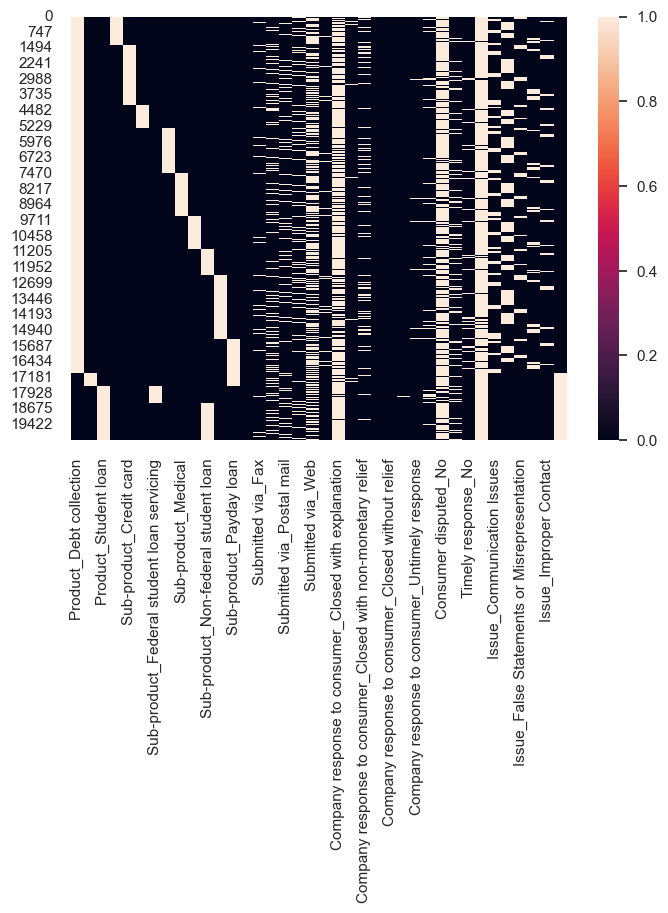

In [416]:
sns.heatmap(dff_encoded)

* **Feature Scaling**

In [417]:
# Apply StandardScaler
std_scaler = StandardScaler()
std_data = std_scaler.fit_transform(dff_encoded)

# put scaled data into a dataframe
scaled_dff = pd.DataFrame(std_data,columns= dff_encoded.columns)

In [418]:
scaled_dff.head()

Product_Debt collection  Product_Payday loan  Product_Student loan  \
0                 0.435336            -0.183713             -0.380852   
1                 0.435336            -0.183713             -0.380852   
2                 0.435336            -0.183713             -0.380852   
3                 0.435336            -0.183713             -0.380852   
4                 0.435336            -0.183713             -0.380852   

   Sub-product_Auto  Sub-product_Credit card  \
0          3.698487                -0.403427   
1          3.698487                -0.403427   
2          3.698487                -0.403427   
3          3.698487                -0.403427   
4          3.698487                -0.403427   

   Sub-product_Federal student loan  \
0                         -0.239462   
1                         -0.239462   
2                         -0.239462   
3                         -0.239462   
4                         -0.239462   

   Sub-product_Federal student loan servicing  Sub-product_I do not know  \
0                                   -0.198769                  -0.347993   
1                                   -0.198769                  -0.347993   
2                                   -0.198769                  -0.347993   
3                                   -0.198769                  -0.347993   
4                                   -0.198769                  -0.347993   

   Sub-product_Medical  Sub-product_Mortgage  ...  Consumer disputed_No  \
0            -0.333205             -0.290154  ...              0.570055   
1            -0.333205             -0.290154  ...              0.570055   
2            -0.333205             -0.290154  ...              0.570055   
3            -0.333205             -0.290154  ...              0.570055   
4            -0.333205             -0.290154  ...              0.570055   

   Consumer disputed_Yes  Timely response_No  Timely response_Yes  \
0              -0.443614           -0.268686             0.268686   
1              -0.443614           -0.268686             0.268686   
2              -0.443614           -0.268686             0.268686   
3              -0.443614           -0.268686             0.268686   
4              -0.443614           -0.268686             0.268686   

   Issue_Communication Issues  Issue_Debt Collection Issues  \
0                    -0.48102                     -0.726221   
1                    -0.48102                     -0.726221   
2                    -0.48102                     -0.726221   
3                    -0.48102                     -0.726221   
4                    -0.48102                     -0.726221   

   Issue_False Statements or Misrepresentation  \
0                                     3.011135   
1                                     3.011135   
2                                     3.011135   
3                                     3.011135   
4                                     3.011135   

   Issue_Illegal Actions or Threats  Issue_Improper Contact  \
0                         -0.363396               -0.317348   
1                         -0.363396               -0.317348   
2                         -0.363396               -0.317348   
3                         -0.363396               -0.317348   
4                         -0.363396               -0.317348   

   Issue_Loan or Payment Issues  
0                     -0.435336  
1                     -0.435336  
2                     -0.435336  
3                     -0.435336  
4                     -0.435336  

[5 rows x 38 columns]

In [419]:
scaled_dff.shape    # checking shape of data

(20154, 38)

## 5 - Reduce Data Dimension

In [420]:
# applying pca algorithm for dimensional reductionality

pca = PCA(n_components=3,svd_solver='full')
pca_dff = pca.fit_transform(scaled_dff)
pca_dff




array([[-0.85200547, -0.84119263, -0.16849893],
       [-0.77662653, -0.31590848,  1.82539649],
       [-0.85200547, -0.84119263, -0.16849893],
       ...,
       [ 4.50634135, -0.33813775, -0.09150798],
       [ 4.67060271,  0.37360519, -2.43107193],
       [ 4.50634135, -0.33813775, -0.09150798]])

In [456]:
# 3. Check Explained Variance
pca.explained_variance_


array([3.96214021, 2.9269742 , 2.03523158])

In [421]:
# Put PCA output into a dataframe
columns = ['pca_comp_%i' % i for i in range(3)]
pca_dff  = pd.DataFrame(pca_dff, columns=columns, index=scaled_dff.index)
pca_dff.head()

pca_comp_0  pca_comp_1  pca_comp_2
0   -0.852005   -0.841193   -0.168499
1   -0.776627   -0.315908    1.825396
2   -0.852005   -0.841193   -0.168499
3   -1.256861   -0.428431    1.839433
4   -0.852005   -0.841193   -0.168499

In [422]:
# Visualize reduced dimension data in a 3d way

fig = px.scatter_3d(pca_dff, x='pca_comp_0', y='pca_comp_1', z='pca_comp_2',size_max=20 ,color_discrete_sequence=['#eae2b7'],
title="PCA Output Visualization")

fig.update_traces(marker=dict(size=8,line=dict(width=2,color='#d62828')),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

## 6 - Clustering Data

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

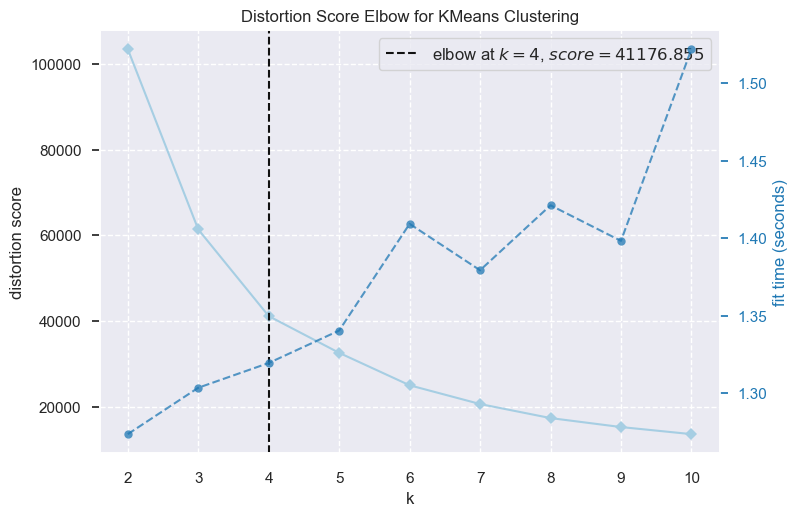

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [423]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_dff)
Elbow_M.show()

### * **Fit reduced dimension data into Kmeans**

In [424]:
KM = KMeans(n_clusters=4, random_state=365)
km_pred = KM.fit_predict(pca_dff)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [425]:
# add predicted clusters for each data point into dataframe
dff["Cluster"]= km_pred

In [426]:
dff.head()

Product Sub-product Submitted via     Company response to consumer  \
0  Debt collection        Auto           Fax          Closed with explanation   
1  Debt collection        Auto           Fax      Closed with monetary relief   
2  Debt collection        Auto           Fax          Closed with explanation   
3  Debt collection        Auto           Fax  Closed with non-monetary relief   
4  Debt collection        Auto           Fax          Closed with explanation   

  Consumer disputed Timely response                                  Issue  \
0                No             Yes  False Statements or Misrepresentation   
1                No             Yes  False Statements or Misrepresentation   
2                No             Yes  False Statements or Misrepresentation   
3                No             Yes  False Statements or Misrepresentation   
4                No             Yes  False Statements or Misrepresentation   

   Cluster  
0        3  
1        3  
2        3  
3        3  
4        3

In [427]:
# add predicted clusters for each data point into reduced dimension data
pca_dff["Cluster"] = km_pred

In [428]:
pca_dff

pca_comp_0  pca_comp_1  pca_comp_2  Cluster
0       -0.852005   -0.841193   -0.168499        3
1       -0.776627   -0.315908    1.825396        3
2       -0.852005   -0.841193   -0.168499        3
3       -1.256861   -0.428431    1.839433        3
4       -0.852005   -0.841193   -0.168499        3
...           ...         ...         ...      ...
20149    4.506341   -0.338138   -0.091508        1
20150    4.640952    1.708425   -1.384442        1
20151    4.506341   -0.338138   -0.091508        1
20152    4.670603    0.373605   -2.431072        1
20153    4.506341   -0.338138   -0.091508        1

[20154 rows x 4 columns]

In [429]:
# Visualize clusterd reduced dimension data in a 3d way

fig = px.scatter_3d(pca_dff, x='pca_comp_0', y='pca_comp_1', z='pca_comp_2',
title="Clusters Visualization",color="Cluster")
fig.update_traces(marker=dict(size=4),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

## EDA on clusters:



Q1. How are the data points distributed across different clusters?

Q2. What is the distribution of the "Product" within each cluster?

Q3. What is the distribution of the "Sub-product" within each cluster?

Q4. What is the distribution of the "Submitted via" method across clusters?

Q5. Are certain issues more prevalent in some clusters compared to others?

Q6. How does the "Timely response" variable relate to different clusters?

Q7. Which cluster has the highest rate of consumer disputes?

Q8. Do certain submission methods (e.g., Fax, Email) dominate specific clusters?

Q9. What are the top 5 issues reported across each cluster?

Q10. Which cluster have more complaints which are closed with monetary relief?

Q11. Which cluster has the highest rate of unresolved disputes?

### Distribution Questions:

**Q1.How are the data points distributed across different clusters?**

In [430]:

# Compute value counts
cluster_counts = dff['Cluster'].value_counts()
print(cluster_counts)

colors = ['yellow', 'blue', 'brown', 'purple']  # Add more colors as needed

fig = go.Figure(data=[go.Bar(
            x=cluster_counts.index,
            y=cluster_counts.values,
            text=cluster_counts.values,
            textposition='auto',
            marker_color=colors[:len(cluster_counts)]  # Use the number of unique clusters to slice the colors list
        )])

fig.update_layout(title_text='Cluster Value Counts', xaxis_title="Cluster", yaxis_title="Count")
fig.show()



3    8910
0    6742
1    3135
2    1367
Name: Cluster, dtype: int64


**Higher no of values belong to cluster 3**

- Cluster 3 is the dominant cluster with the highest count of 8,910.
- Cluster 0 follows closely with 6,742 values.
- Cluster 1 has a moderate count of 3,135 values.
- Cluster 2 has the fewest entries, with a total of 1,367 values.

**Q2.What is the distribution of the "Product" within each cluster?**

In [431]:
dff.groupby(['Product' ,'Cluster'])['Cluster'].count()

Product          Cluster
Debt collection  0          6742
                 2          1291
                 3          8910
Payday loan      1           595
                 2            63
Student loan     1          2540
                 2            13
Name: Cluster, dtype: int64

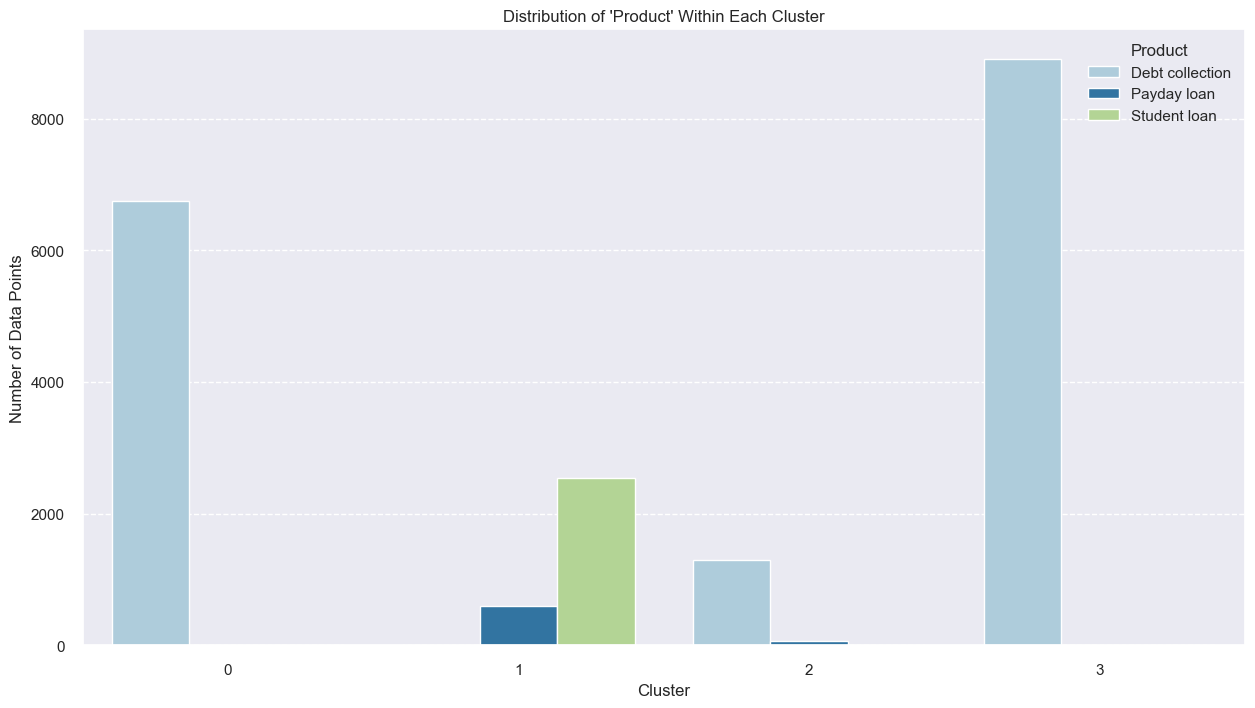

In [432]:
# 2. Distribution of the "Product" within each cluster
plt.figure(figsize=(15, 8))
sns.countplot(data=dff, x="Cluster", hue="Product")
plt.title("Distribution of 'Product' Within Each Cluster")
plt.ylabel("Number of Data Points")
plt.legend(title="Product", loc="upper right")

plt.show()


**The graph above displays the distribution of the "Product" within each cluster. It appears that "Debt collection" is the dominant product across all clusters.**


**Q3.What is the distribution of the "Sub-Product" within each cluster?**

In [433]:
dff.groupby(['Sub-product' ,'Cluster'])['Cluster'].count()

Sub-product                            Cluster
Auto                                   0           742
                                       2            91
                                       3           540
Credit card                            0           825
                                       2           118
                                       3          1878
Federal student loan                   0           609
                                       2            19
                                       3           465
Federal student loan servicing         1           757
                                       2             9
I do not know                          0           802
                                       2           228
                                       3          1147
Medical                                0           887
                                       2           253
                                       3           874
Mortgage          

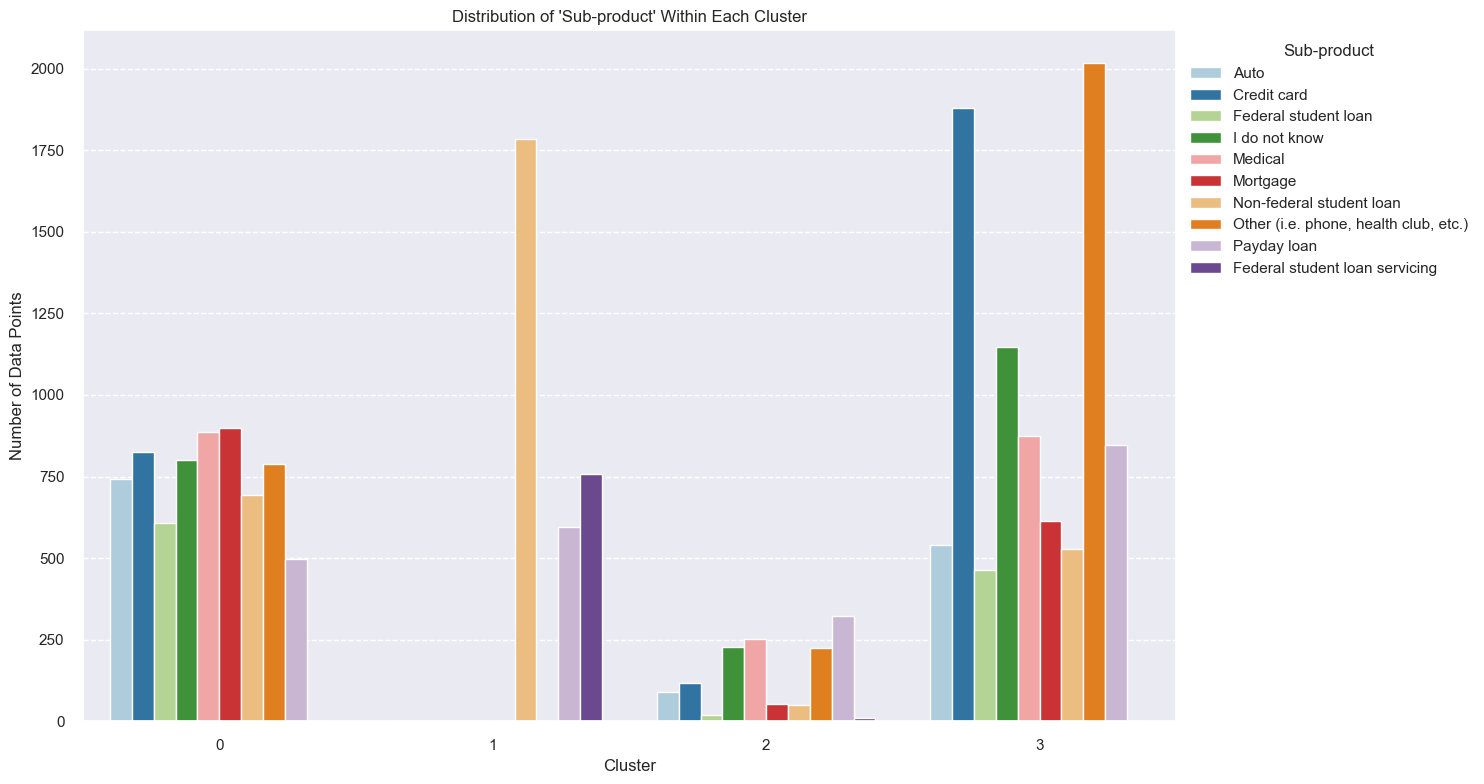

In [434]:
# Plotting the distribution of the "Sub-product" within each cluster with fixed legends
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=dff, x="Cluster", hue="Sub-product")
plt.title("Distribution of 'Sub-product' Within Each Cluster")
plt.ylabel("Number of Data Points")
plt.legend(title="Sub-product", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


**CLUSTER 0:**

Most prominent sub-product: "Mortgage" and "Medical".It has almost all sub products.
Other sub-products are present but in noticeably smaller numbers.

**CLUSTER 1:**

Most prominent sub-product: "Non-federal student loan" , followed by "Federal student loan servicing" and "Pay day loan".
Other sub-products are present but in noticeably smaller numbers.
Only cluster 1 has "Federal Student Loan servicing".

**CLUSTER 2:**

Most prominent sub-product: "Pay day loan" and "Other".
It has all the sub products except "Federal Student Loan servicing" .
Other sub-products are even less prevalent than in Clusters 0 and 1.

**CLUSTER 3:**

Most prominent sub-product: "Credit Card" and "Other".
It has all the sub products except "Federal Student Loan servicing".

**From the visual representation and this summary, it's clear that the "Auto" sub-product is the most prominent in all clusters.**

**Q4.What is the distribution of the "Submitted via" method across clusters?**

In [435]:
dff.groupby(['Cluster','Submitted via'])['Submitted via'].count()

Cluster  Submitted via
0        Email               1
         Fax               192
         Phone             363
         Postal mail       358
         Referral          335
         Web              5493
1        Email              10
         Fax               128
         Phone             646
         Postal mail       356
         Referral          637
         Web              1358
2        Email               2
         Fax                63
         Phone             274
         Postal mail       109
         Referral          120
         Web               799
3        Email               4
         Fax               615
         Phone            2553
         Postal mail      1569
         Referral         1988
         Web              2181
Name: Submitted via, dtype: int64

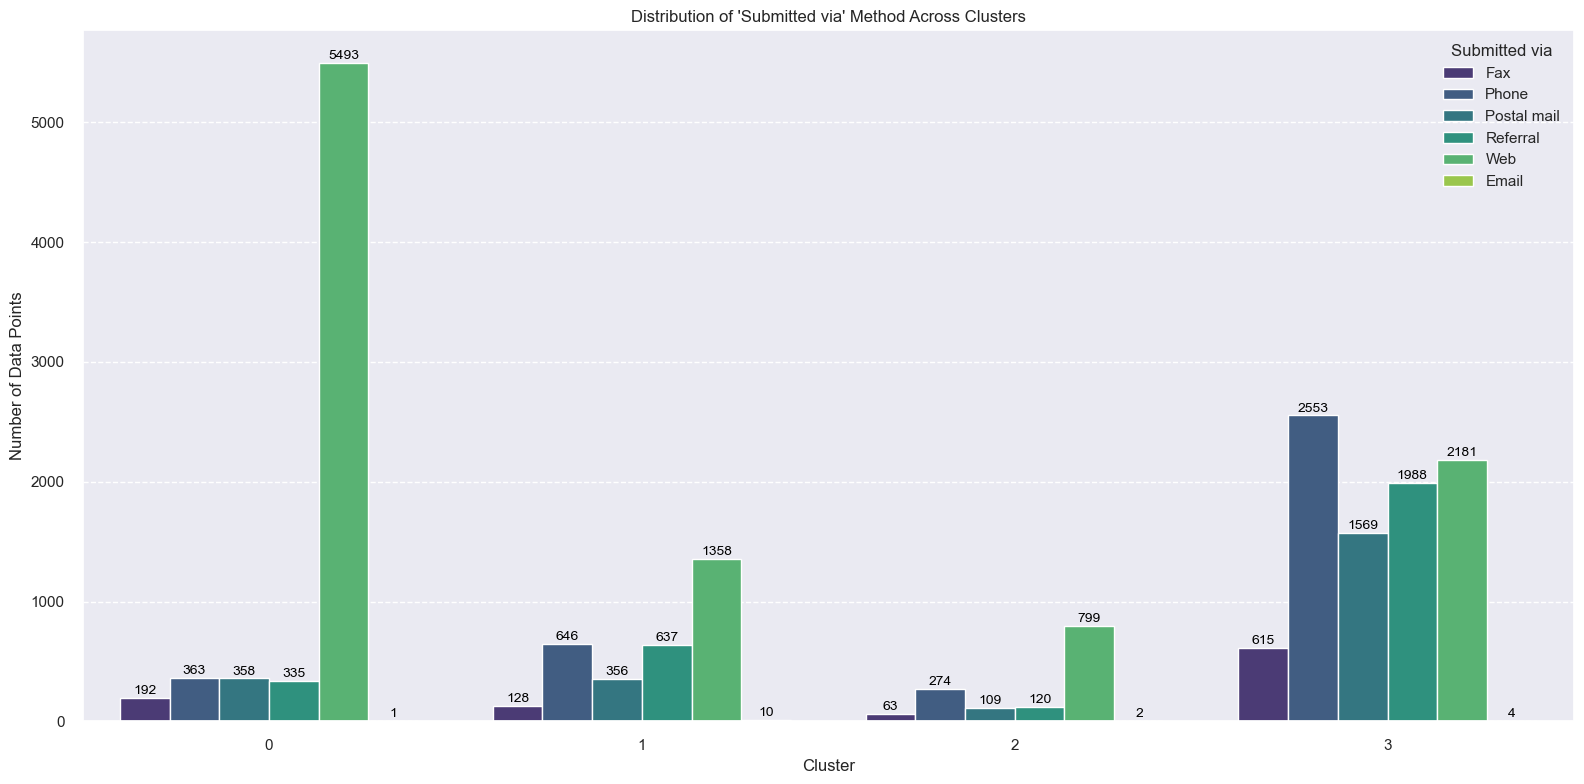

In [436]:


# Plotting the data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x="Cluster", hue="Submitted via", data=dff, palette="viridis")
plt.title("Distribution of 'Submitted via' Method Across Clusters")
plt.ylabel("Number of Data Points")
plt.xlabel("Cluster")
plt.legend(title="Submitted via", loc="upper right")

# Annotating the bars with the exact count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


From the graph, we can derive several observations:

**Cluster 0:**

The majority of data points are submitted via the "Web" method, followed closely by "Referral" and "Phone".
Fewest submissions are through "Email".

**Cluster 1:**

The dominant submission method is "Web", which far exceeds the other methods in this cluster.
"Email" has the least number of submissions.

**Cluster 2:**

The "Web" submission method is again the most frequent, but not as dominant as in Cluster 0.
"Email" and "Fax" have the fewest submissions.

**Cluster 3:**

The submission methods are more evenly distributed compared to other clusters.
"Phone", "Web", and "Referral" have similar frequencies, making them the top three methods.
"Email" is the least used submission method.

Overall, the "Web" method seems to be the most prevalent submission method across all clusters, with Cluster 1 having a particularly high number of "Web" submissions. The "Email" method is consistently the least common across the clusters.

**Q5.Are certain issues more prevalent in some clusters compared to others?**

In [437]:
dff.groupby(['Cluster','Issue'])['Issue'].count()


Cluster  Issue                                
0        Communication Issues                     1079
         Debt Collection Issues                   2194
         False Statements or Misrepresentation    1048
         Illegal Actions or Threats               1388
         Improper Contact                         1033
1        Loan or Payment Issues                   3135
2        Communication Issues                      323
         Debt Collection Issues                    430
         False Statements or Misrepresentation     164
         Illegal Actions or Threats                231
         Improper Contact                          143
         Loan or Payment Issues                     76
3        Communication Issues                     2385
         Debt Collection Issues                   4335
         False Statements or Misrepresentation     790
         Illegal Actions or Threats                732
         Improper Contact                          668
Name: Issue, dtype

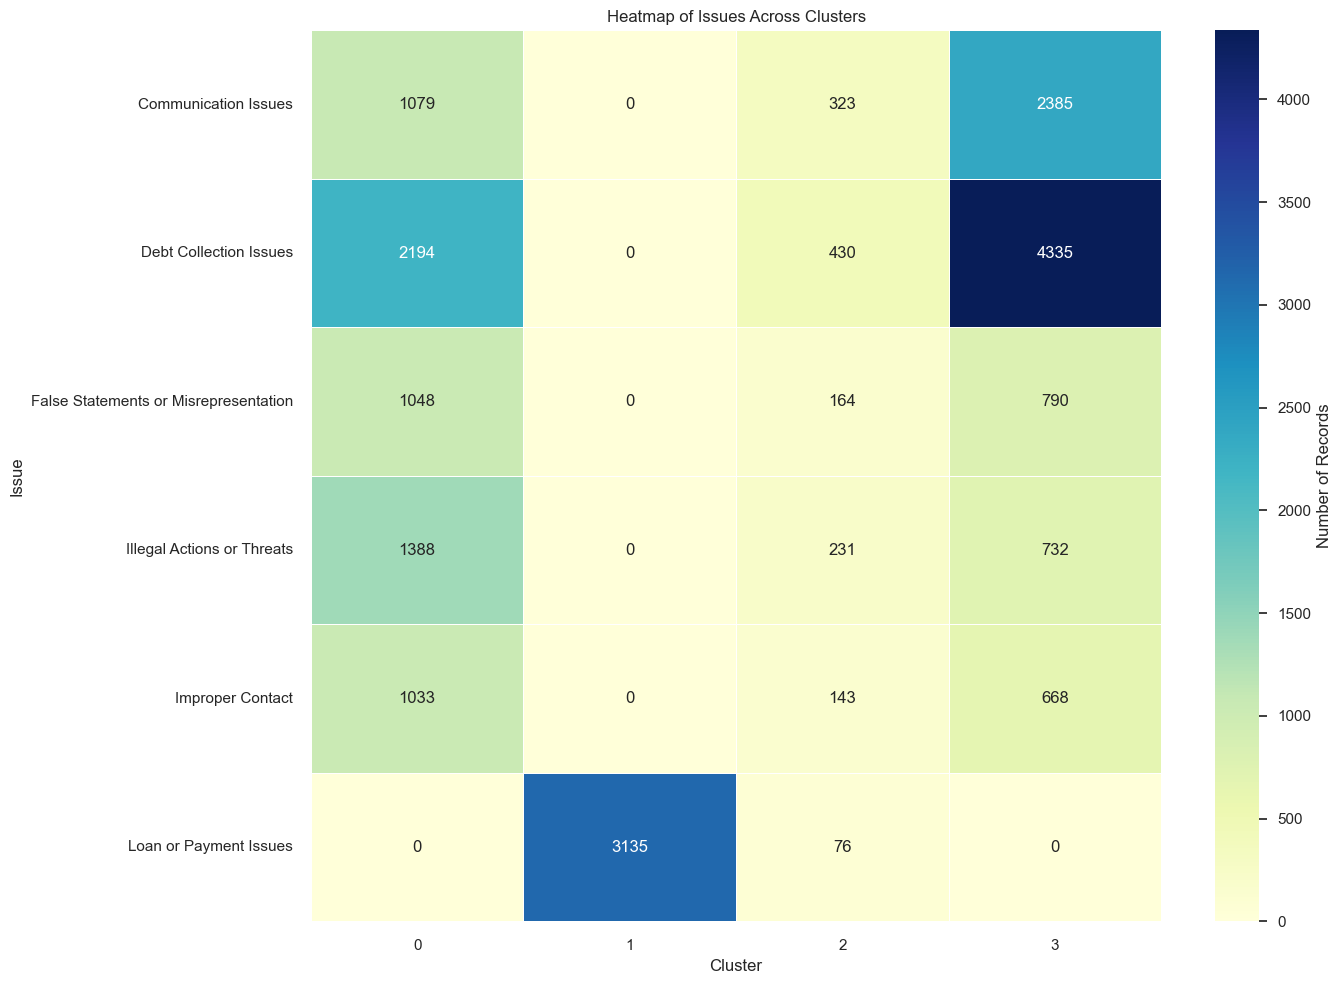

In [438]:
# Generating a cross-tabulation between 'Issue' and 'Cluster'
issue_cross_tab = pd.crosstab(dff['Issue'], dff['Cluster'])

# Plotting the heatmap for issues across clusters
plt.figure(figsize=(14, 10))
sns.heatmap(issue_cross_tab, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Records'})
plt.title('Heatmap of Issues Across Clusters')
plt.ylabel('Issue')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

**Above heat map shows the distribution of Issues in across clusters.**

The heatmap visualizes the distribution of issues across clusters.

**Cluster 0:**

Communication Issues                    
Debt Collection Issues                   
False Statements or Misrepresentation    
Illegal Actions or Threats              
Improper Contact   

**Cluster 1:**

Loan or Payment Issues

**Cluster 2:**

Communication Issues                      
Debt Collection Issues                    
False Statements or Misrepresentation     
Illegal Actions or Threats                
Improper Contact                    
Loan or Payment Issues 


**Cluster 3:**

Communication Issues                 
Debt Collection Issues                 
False Statements or Misrepresentation    
Illegal Actions or Threats              
Improper Contact        



**Q6.How does the "Timely response" variable relate to different clusters?**

Cluster  Timely response
0        Yes                6742
1        No                   21
         Yes                3114
2        No                 1336
         Yes                  31
3        Yes                8910
Name: Timely response, dtype: int64


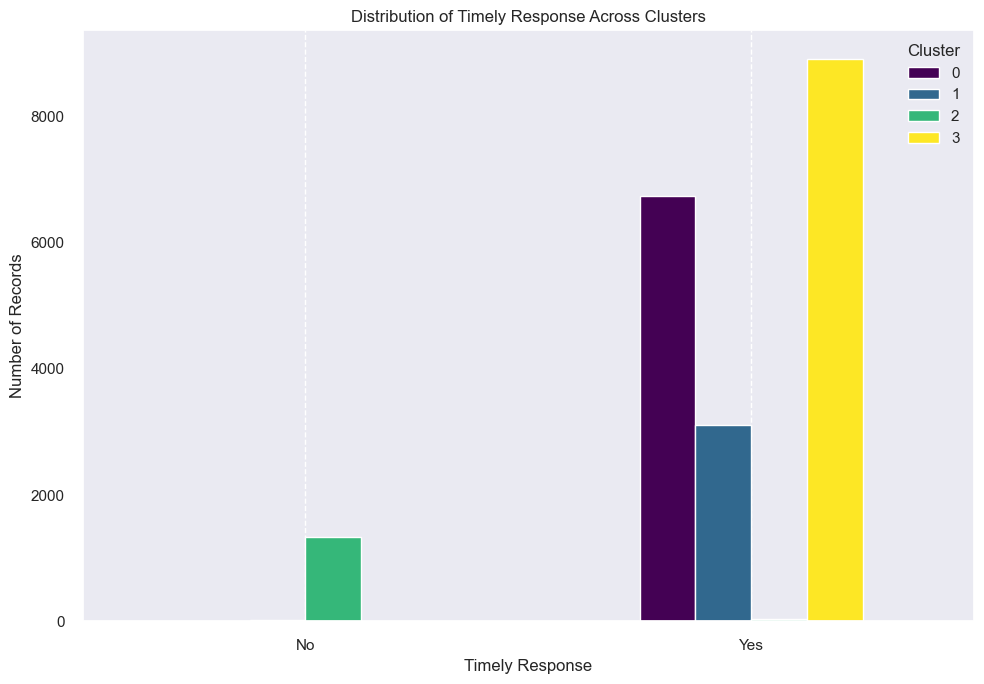

In [439]:
print(dff.groupby(['Cluster','Timely response'])['Timely response'].count())


# Generating a cross-tabulation between 'Timely response' and 'Cluster'
timely_response = pd.crosstab(dff['Timely response'], dff['Cluster'])

# Plotting the bar chart for 'Timely response' across clusters
timely_response.plot(kind='bar', stacked=False, figsize=(10, 7), colormap="viridis")
plt.title('Distribution of Timely Response Across Clusters')
plt.ylabel('Number of Records')
plt.xlabel('Timely Response')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()


From the chart, we can observe:

**Yes Responses:** The majority of records across all clusters have received a timely response, as indicated by the "Yes" category.

**No Responses:** The instances where a timely response was not provided ("No" category) are fewer but are present in clusters, especially in Cluster 2.

**Cluster 2 has a notable number of non-timely responses, highlighting "Timely response" as a potential distinguishing factor for this cluster.**

**Q7. Which cluster has the highest rate of consumer disputes?**

Cluster
0    2557
1     584
2      95
3      78
Name: Yes, dtype: int64


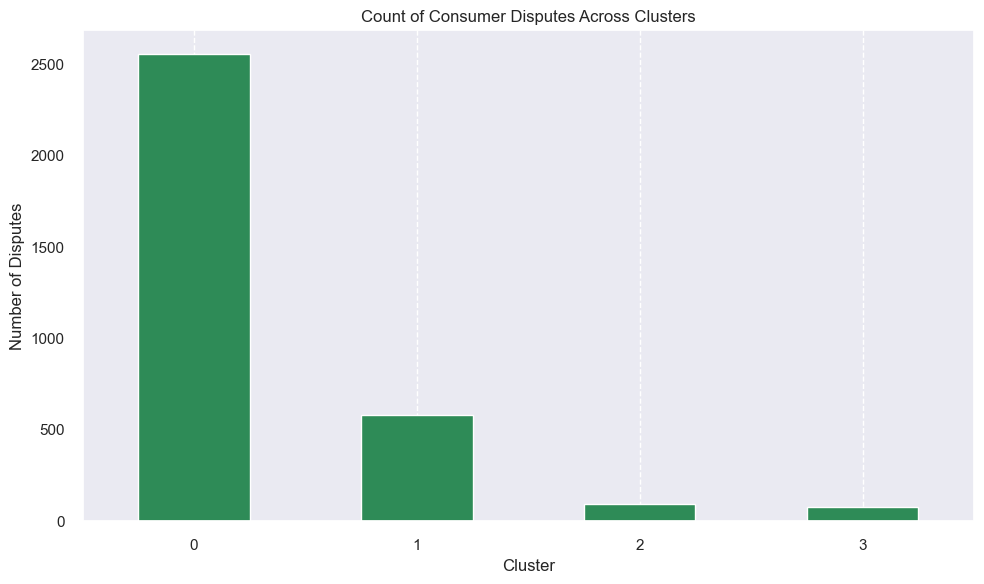

In [440]:

# Generating a cross-tabulation between 'Consumer disputed' and 'Cluster'
consumer_disputed = pd.crosstab(dff['Cluster'], dff['Consumer disputed'])

print(consumer_disputed['Yes'])

# Plotting the count of consumer disputes for each cluster
plt.figure(figsize=(10, 6))
consumer_disputed['Yes'].plot(kind='bar', color='seagreen')
plt.title('Count of Consumer Disputes Across Clusters')
plt.ylabel('Number of Disputes')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Cluster 0:** 2557 consumer disputed.

**Cluster 1:** 584  consumer disputed.

**Cluster 2:** 95   consumer disputed.

**Cluster 3:** 78   consumer disputed.

I infer that cluster 0 have consumers which disputed on their complaints over the company response and make different cluster. 

**Q8. Do certain submission methods (e.g., Fax, Email) dominate specific clusters?**

Cluster  Submitted via
0        Email               1
         Fax               192
         Phone             363
         Postal mail       358
         Referral          335
         Web              5493
1        Email              10
         Fax               128
         Phone             646
         Postal mail       356
         Referral          637
         Web              1358
2        Email               2
         Fax                63
         Phone             274
         Postal mail       109
         Referral          120
         Web               799
3        Email               4
         Fax               615
         Phone            2553
         Postal mail      1569
         Referral         1988
         Web              2181
Name: Submitted via, dtype: int64


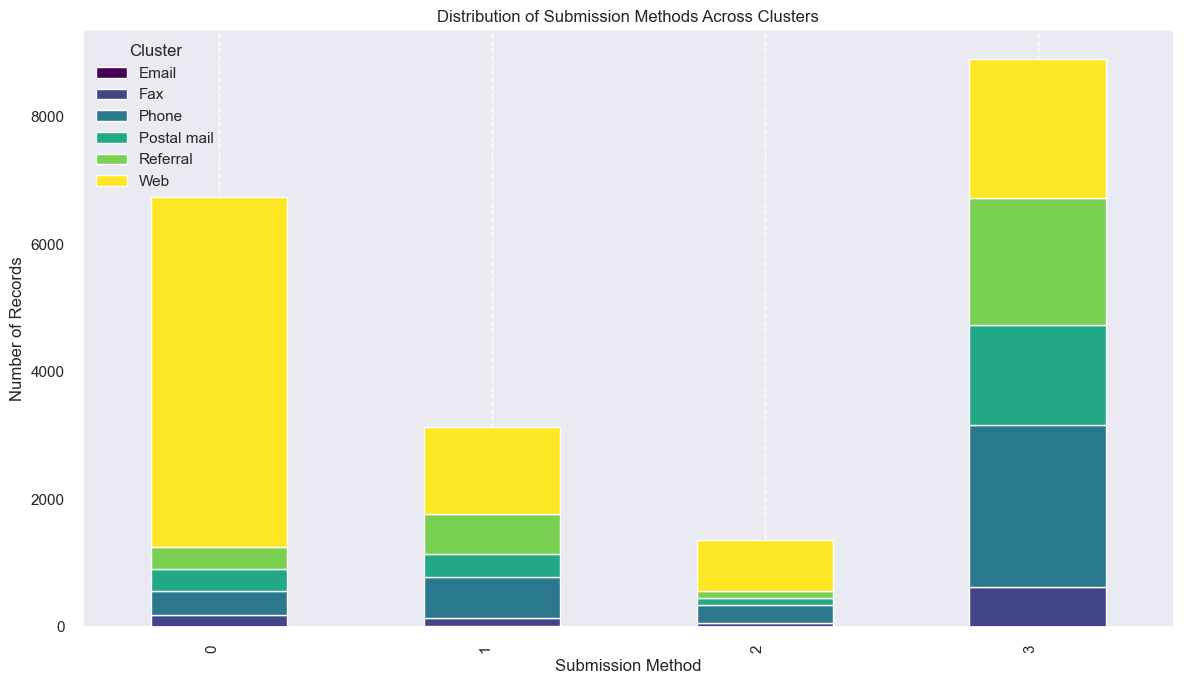

In [441]:
submit_by = dff.groupby(['Cluster' , 'Submitted via'])['Submitted via'].count()
print(submit_by)


# Plotting the bar chart for 'Submitted via' across clusters
submit_by.unstack().plot(kind='bar', stacked=True, figsize=(12, 7), colormap="viridis")
plt.title('Distribution of Submission Methods Across Clusters')
plt.ylabel('Number of Records')
plt.xlabel('Submission Method')
plt.xticks( ha="right")
plt.tight_layout()
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()



- **Cluster 0**: Mostly submitted via Web (5,493 submissions) and least using Email (1 submission).
- **Cluster 1**: Mostly submitted via Web (1,358 submissions) and least using Email (10 submissions).
- **Cluster 2**: Mostly submitted via Web (799 submissions) and least using Email (2 submissions).
- **Cluster 3**: Mostly submitted via Web (2,181 submissions) and phone(2553 submissions) and least using Email (4 submissions).

This summary provides a quick overview that consumer refer web and phone services of government to submit their complaint.

**Q9. What are the top 5 issues reported across each cluster?**

In [442]:
top_5_issues = dff.groupby(['Cluster','Issue'])['Issue'].count().sort_values(ascending = False).head()
top_5_issues

Cluster  Issue                     
3        Debt Collection Issues        4335
1        Loan or Payment Issues        3135
3        Communication Issues          2385
0        Debt Collection Issues        2194
         Illegal Actions or Threats    1388
Name: Issue, dtype: int64

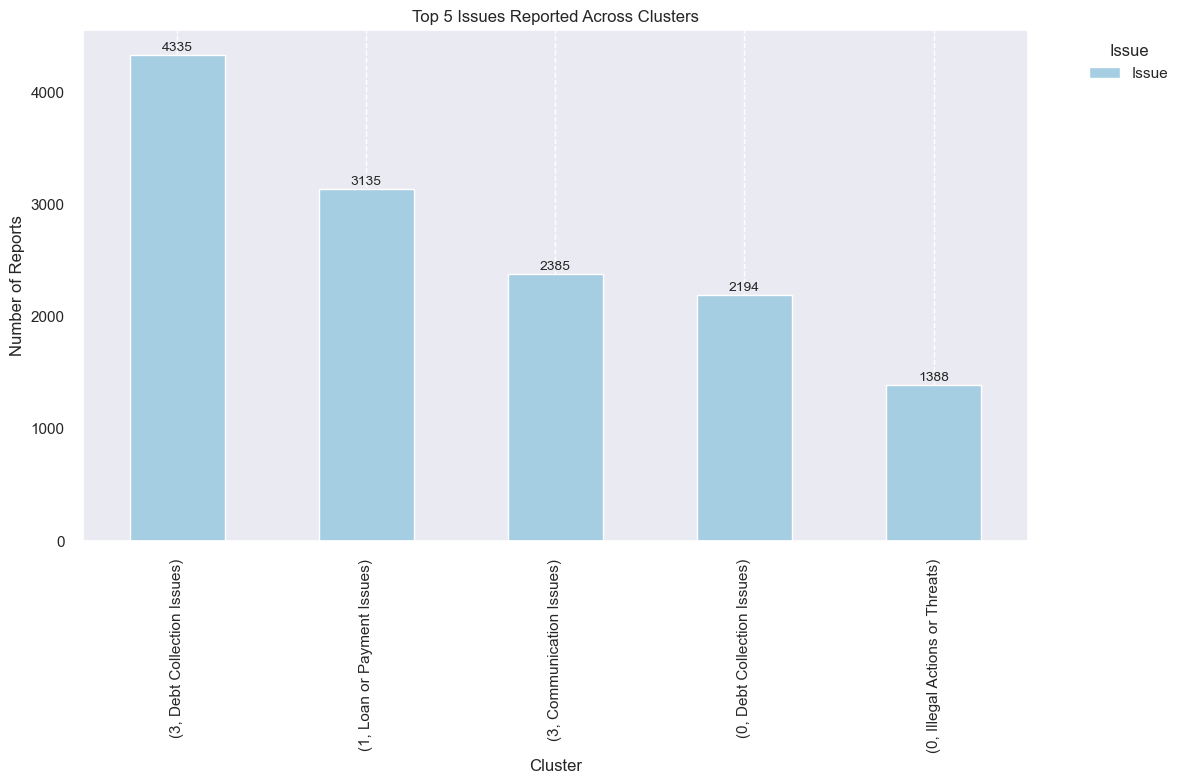

In [443]:
# Plotting the data
plt.figure(figsize=(12, 8))
bars= top_5_issues.plot(kind = 'bar', x='Cluster', y='Count')
plt.title('Top 5 Issues Reported Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Reports')
plt.legend(title='Issue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')

# Adding annotations on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=10, xytext=(0, 5),
                  textcoords='offset points')

plt.show()


The data provides insights into the top 5 complaints reported across different clusters:

1. **Cluster 3** witnesses the highest number of complaints related to "Debt Collection Issues" with a total of 4,335 reports.
2. **Cluster 1** predominantly features complaints regarding "Loan or Payment Issues" with a count of 3,135.
3. **Cluster 3** also experiences a significant volume of "Communication Issues", amounting to 2,385 complaints.
4. **Cluster 0** registers 2,194 complaints associated with "Debt Collection Issues".
5. **Cluster 0** further records 1,388 complaints related to "Illegal Actions or Threats".

From this, we can infer that "Debt Collection Issues" is a recurring concern across multiple clusters, specifically dominating Clusters 3 and 0. Meanwhile, Cluster 1 is distinguished by concerns over "Loan or Payment Issues".



**Q10. Which cluster have more complaints which are closed with monetary relief?**

In [444]:
monetary_relief= dff[dff['Company response to consumer'] == 'Closed with monetary relief']
monetary_relief


monetary_relief.groupby('Cluster')['Company response to consumer'].count()

Cluster
0     25
1    128
2     13
3    229
Name: Company response to consumer, dtype: int64

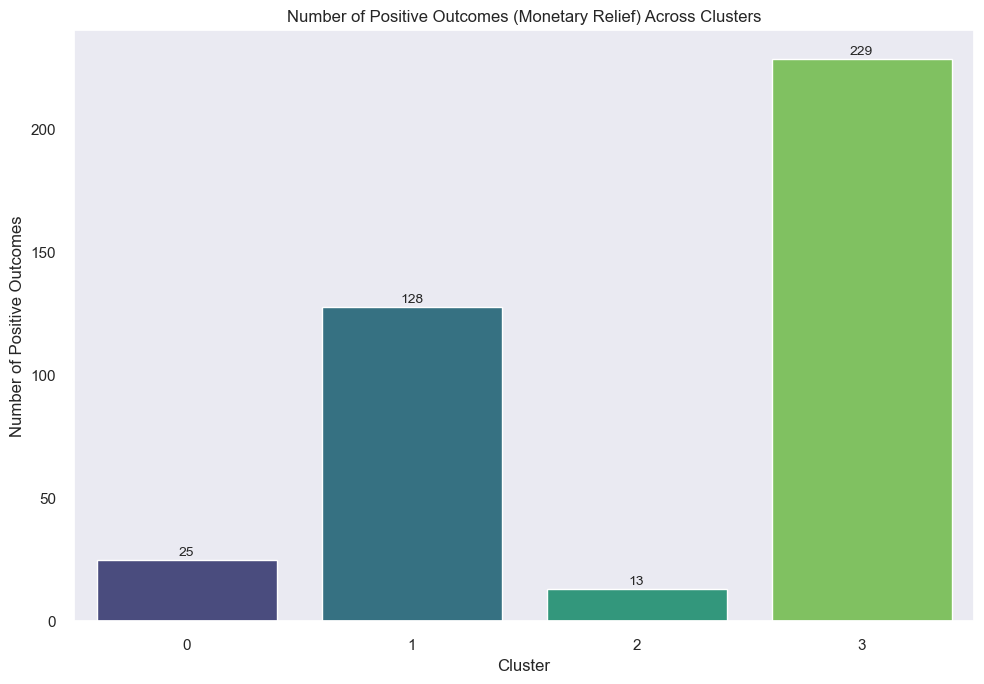

In [445]:

# Plotting the data
plt.figure(figsize=(10, 7))
bars = sns.countplot(data=monetary_relief, x='Cluster', palette='viridis')
plt.title('Number of Positive Outcomes (Monetary Relief) Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Positive Outcomes')
plt.grid(axis='y')
plt.tight_layout()

# Adding annotations on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=10, xytext=(0, 5),
                  textcoords='offset points')

plt.show()



**Cluster 0:**  25 cases where the company provided monetary relief.

**Cluster 1:** 128 cases where the company provided monetary relief. 

**Cluster 2:**  With only 13 cases receiving monetary relief.

**Cluster 3:** Cluster 3 has 229 cases where consumers received monetary relief, suggesting this cluster's consumers frequently attain favorable resolutions


**Q11. Which cluster has the higher no of complaints that are in progress?**

In [446]:
dff['Company response to consumer'].unique()

array(['Closed with explanation', 'Closed with monetary relief',
       'Closed with non-monetary relief', 'Closed', 'Untimely response',
       'In progress', 'Closed without relief', 'Closed with relief'],
      dtype=object)

In [447]:
complaints_in_progress = dff[dff['Company response to consumer']=='In progress']

complaints_in_progress.groupby(['Cluster','Company response to consumer'])['Company response to consumer'].count()

Cluster  Company response to consumer
0        In progress                     42
1        In progress                     34
2        In progress                     29
Name: Company response to consumer, dtype: int64

0    42
1    34
2    29
Name: Cluster, dtype: int64


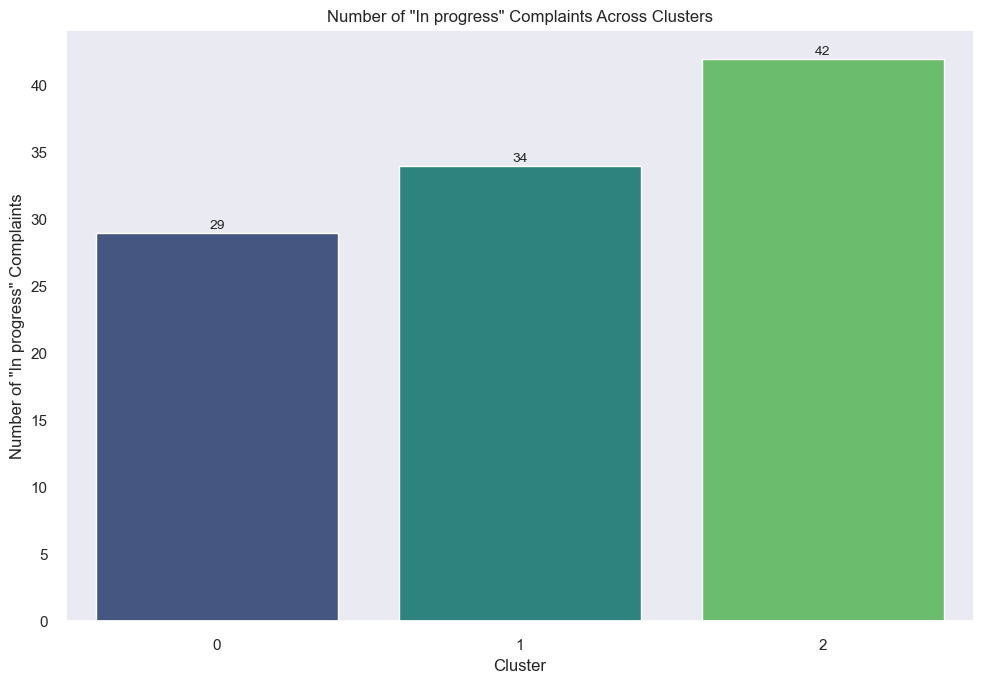

In [448]:
value_count= complaints_in_progress['Cluster'].value_counts()
print(value_count)

# Plotting the data
plt.figure(figsize=(10, 7))
bars = sns.barplot( x=value_count.index, y=value_count.values, palette='viridis', data= value_count)
plt.title('Number of "In progress" Complaints Across Clusters')
plt.xticks(ticks=range(len(value_count.index)), labels=sorted(value_count.index))
plt.xlabel('Cluster')
plt.ylabel('Number of "In progress" Complaints')
plt.grid(axis='y')
plt.tight_layout()

# Adding annotations on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=10, xytext=(0, 5),
                  textcoords='offset points')

plt.show()



**The above graph shows that only few complaints are in progress , not much complaints are delayed .**

## Summarizing Report on Clusters:


- Cluster 3 is the dominant cluster with the highest count of **8,910**.
- Cluster 0 follows closely with **6,742 values**.
- Cluster 1 has a moderate count of **3,135 values**.
- Cluster 2 has the fewest entries, with a total of **1,367** values.

Here's the updated summary for each cluster, including the unique characteristics:

---

**Cluster 0:**
- **Size:** 6,742 members
- **Product Profile:** Primarily involved with "Debt collection" related to "Mortgage"
- **Submission Method:** Majority submitted via the web
- **Company Response:** Most commonly "Closed with explanation"
- **Consumer Behavior:** 37.93% of members disputed the company's response; most received a timely response from the company
- **Primary Issue:** Higher no of "Illegal actions and threats" , "Improper Contact" and "Communication Issue".
- **Monetary Relief:** Company provided monetary relief to 25 members.
- **Unique Characteristics:** Most submissions via the web, most issues related to "Debt Collection", and significant disputes.

---

**Cluster 1:**
- **Size:** 3,135 members
- **Product Profile:** Primarily involved with "Student loan" specifically "Non-federal student loan"
- **Submission Method:** Majority submitted via the web
- **Company Response:** Most commonly "Closed with explanation"
- **Consumer Behavior:** Most did not dispute the company's response and received a timely response from the company
- **Primary Issue:** "Loan or Payment Issues"
- **Monetary Relief:** Company provided monetary relief to 128 members.
- **Unique Characteristics:** Most issues related to "Student loans" and "Loan or Payment Issues".

---

**Cluster 2:**
- **Size:** 1,367 members
- **Product Profile:** Primarily involved with "Debt collection" related to "Payday loan"
- **Submission Method:** Majority submitted via the web
- **Company Response:** Most commonly "Closed with explanation"
- **Consumer Behavior:** Most did not dispute the company's response, but a significant number did not receive a timely response
- **Primary Issue:** "Debt Collection Issues"
- **Monetary Relief:** Company provided monetary relief to 13 members.
- **Unique Characteristics:** Most issues related to "Payday loans" and significant members not receiving a timely response.

---

**Cluster 3:**
- **Size:** 8,910 members
- **Product Profile:** Primarily involved with "Debt collection" related to "Other (i.e. phone, health club, etc.)"
- **Submission Method:** Majority submitted via phone
- **Company Response:** Most commonly "Closed with explanation"
- **Consumer Behavior:** Most did not dispute the company's response and received a timely response from the company
- **Primary Issue:** "Debt Collection Issues"
- **Monetary Relief:** Company provided monetary relief to 229 members.
- **Unique Characteristics:** Most submissions via phone and most issues related to "Other" sub-products.

---

The unique characteristics point out the distinct features of each cluster, potentially highlighting the basis on which the algorithm might have clustered the data.

## Final conclusion:


### I infer that:

* It tell us that most of the complaints that are belong to cluster 3 are well handled by companies.


* I can infer that "Debt Collection Issues" is a recurring concern across multiple clusters, specifically dominating Clusters 3   and 0. Meanwhile, Cluster 1 is distinguished by concerns over "Loan or Payment Issues".

* Cluster 0 face higher no of "Illegal actions and threats" , "Improper Contact" and "Communication Issue".

* Cluster 1 seems to predominantly consist of complaints related to "Student loans," specifically "Non-federal student loans." The primary issue faced by consumers in this cluster is "Loan or Payment Issues." This distinct focus on student loans and related payment issues differentiates Cluster 1 from the overall dataset and possibly the other clusters as well.

* Cluster 2  people  did not receive a timely response.

* People don't prefer email service to submit there complaints.

* Lower cases are in progress. Majority are handeled on time and closed with explanation.

* Companies have to do work on cluster 0 where consumer mostly disputed.

* Government may create teams for cluster 0 and cluster 2 to solve the consumer issues and look that which companies are doing   such practices.

* Companies belong to cluster 3 must be ranked by government for their consumer complaints solving strategy.

* Cluster 1, with its focus on student loans and related payment issues, might suggest a need for better financial education or loan counseling for students. Government must make some policies for cluster 1 which gives relief to students for their educational expenses.
